# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) nome1
    2) nome2
    3) nome3
    4) nome4

### Enunciado

A QuantumFinance possui um modelo de risco de crédito desatualizado, que tem concedido cartões para um número muito alto de mau pagadores e gerando problemas financeiros para a companhia.

O objetivo é realizar uma análise exploratória para compreender o comportamento dos dados e tentar descobrir um padrão que explique e diferencie clientes bons de maus pagadores.

Seu trabalho é:

1. Explorar e analisar os dados para entender a distribuição das características e a relação com a classificação de cada cliente.

2. Responder as seguintes perguntas:

    * Como as features sexo, estado civil, quantidade de dependentes e nível educacional está relacionada com a variável meta?
    * Plote um gráfico que mostre a distribuição de bons e maus pagadores por estado. Escolha o gráfico que achar mais conveniente
    * Use boxplot para explicar como o tipo de residência interfere na classificação do pagador
    * Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)
    * A idade interfere na classificação do pagador?

#### Entregáveis:

Jupyter Notebook:  O notebook deverá estar bem organizado com seções claras e textos que facilitem a compreensão da análise e decisões tomadas e que permita a obtenção do resultado final a partir do dataset disponibilizado.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Database
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv", 
                 encoding='unicode_escape', 
                 sep='\t', 
                 header=None)

# Visualizando dataset
df

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\3828368577.py:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv",


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,...,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,...,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,...,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,28,320,320,1


In [3]:
# Visualizando 5 primeiros dados
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [4]:
# Visualizando os 5 últimos dados
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
49995,49996,C,10,0,0,1,F,1,2,0,...,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,...,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,...,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,28,320,320,1
49999,50000,C,10,Web,0,1,F,2,2,0,...,0,0,0,0,1,N,27,124,124,0


In [5]:
# Visualizando linhas e colunas
df.shape

(50000, 54)

In [6]:
# Visualizando info dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50000 non-null  int64  
 1   1       50000 non-null  object 
 2   2       50000 non-null  int64  
 3   3       50000 non-null  object 
 4   4       50000 non-null  int64  
 5   5       50000 non-null  int64  
 6   6       50000 non-null  object 
 7   7       50000 non-null  int64  
 8   8       50000 non-null  int64  
 9   9       50000 non-null  int64  
 10  10      50000 non-null  object 
 11  11      50000 non-null  object 
 12  12      50000 non-null  int64  
 13  13      50000 non-null  object 
 14  14      50000 non-null  object 
 15  15      50000 non-null  object 
 16  16      50000 non-null  object 
 17  17      50000 non-null  object 
 18  18      48651 non-null  float64
 19  19      46223 non-null  float64
 20  20      50000 non-null  object 
 21  21      50000 non-null  int64  
 22

In [7]:
# Visualizando tipos de dados
df.dtypes

0       int64
1      object
2       int64
3      object
4       int64
5       int64
6      object
7       int64
8       int64
9       int64
10     object
11     object
12      int64
13     object
14     object
15     object
16     object
17     object
18    float64
19    float64
20     object
21      int64
22    float64
23    float64
24      int64
25      int64
26      int64
27      int64
28      int64
29      int64
30      int64
31    float64
32      int64
33     object
34     object
35     object
36     object
37     object
38     object
39      int64
40    float64
41    float64
42    float64
43    float64
44      int64
45      int64
46      int64
47      int64
48      int64
49     object
50      int64
51     object
52     object
53      int64
dtype: object

# Pré-processamento

In [8]:
# Dicionário atualizado de renomeação com a correção no índice da variável alvo
rename_dict = {
    0: 'ID_CLIENTE',
    1: 'TIPO_FUNCIONARIO',
    2: 'DIA_PAGAMENTO',
    3: 'TIPO_ENVIO_APLICACAO',
    4: 'QUANT_CARTOES_ADICIONAIS',
    5: 'TIPO_ENDERECO_POSTAL',
    6: 'SEXO',
    7: 'ESTADO_CIVIL',
    8: 'QUANT_DEPENDENTES',
    9: 'NIVEL_EDUCACIONAL',
    10: 'ESTADO_NASCIMENTO',
    11: 'CIDADE_NASCIMENTO',
    12: 'NACIONALIDADE',
    13: 'ESTADO_RESIDENCIAL',
    14: 'CIDADE_RESIDENCIAL',
    15: 'BAIRRO_RESIDENCIAL',
    16: 'FLAG_TELEFONE_RESIDENCIAL',
    17: 'CODIGO_AREA_TELEFONE_RESIDENCIAL',
    18: 'TIPO_RESIDENCIA',
    19: 'MESES_RESIDENCIA',
    20: 'FLAG_TELEFONE_MOVEL',
    21: 'FLAG_EMAIL',
    22: 'RENDA_PESSOAL_MENSAL',
    23: 'OUTRAS_RENDAS',
    24: 'FLAG_VISA',
    25: 'FLAG_MASTERCARD',
    26: 'FLAG_DINERS',
    27: 'FLAG_AMERICAN_EXPRESS',
    28: 'FLAG_OUTROS_CARTOES',
    29: 'QUANT_CONTAS_BANCARIAS',
    30: 'QUANT_CONTAS_BANCARIAS_ESPECIAIS',
    31: 'VALOR_PATRIMONIO_PESSOAL',
    32: 'QUANT_CARROS',
    33: 'EMPRESA',
    34: 'ESTADO_PROFISSIONAL',
    35: 'CIDADE_PROFISSIONAL',
    36: 'BAIRRO_PROFISSIONAL',
    37: 'FLAG_TELEFONE_PROFISSIONAL',
    38: 'CODIGO_AREA_TELEFONE_PROFISSIONAL',
    39: 'MESES_NO_TRABALHO',
    40: 'CODIGO_PROFISSAO',
    41: 'TIPO_OCUPACAO',
    42: 'CODIGO_PROFISSAO_CONJUGE',
    43: 'NIVEL_EDUCACIONAL_CONJUGE',
    44: 'FLAG_DOCUMENTO_RESIDENCIAL',
    45: 'FLAG_RG',
    46: 'FLAG_CPF',
    47: 'FLAG_COMPROVANTE_RENDA',
    48: 'PRODUTO',
    49: 'FLAG_REGISTRO_ACSP',
    50: 'IDADE',
    51: 'CEP_RESIDENCIAL', 
    52: 'CEP_RESIDENCIAL_3', 
    53: 'ROTULO_ALVO_MAU'  # Correção: última coluna é 53, e não 54
}

# Aplicar renomeação
df.rename(columns=rename_dict, inplace=True)

# Visualizar as primeiras linhas do DataFrame atualizado
df.head()

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL,CEP_RESIDENCIAL_3,ROTULO_ALVO_MAU
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [9]:
# Verificar se a renomeação foi aplicada corretamente
print("Colunas depois da renomeação:")
print(df.columns.tolist())

Colunas depois da renomeação:
['ID_CLIENTE', 'TIPO_FUNCIONARIO', 'DIA_PAGAMENTO', 'TIPO_ENVIO_APLICACAO', 'QUANT_CARTOES_ADICIONAIS', 'TIPO_ENDERECO_POSTAL', 'SEXO', 'ESTADO_CIVIL', 'QUANT_DEPENDENTES', 'NIVEL_EDUCACIONAL', 'ESTADO_NASCIMENTO', 'CIDADE_NASCIMENTO', 'NACIONALIDADE', 'ESTADO_RESIDENCIAL', 'CIDADE_RESIDENCIAL', 'BAIRRO_RESIDENCIAL', 'FLAG_TELEFONE_RESIDENCIAL', 'CODIGO_AREA_TELEFONE_RESIDENCIAL', 'TIPO_RESIDENCIA', 'MESES_RESIDENCIA', 'FLAG_TELEFONE_MOVEL', 'FLAG_EMAIL', 'RENDA_PESSOAL_MENSAL', 'OUTRAS_RENDAS', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OUTROS_CARTOES', 'QUANT_CONTAS_BANCARIAS', 'QUANT_CONTAS_BANCARIAS_ESPECIAIS', 'VALOR_PATRIMONIO_PESSOAL', 'QUANT_CARROS', 'EMPRESA', 'ESTADO_PROFISSIONAL', 'CIDADE_PROFISSIONAL', 'BAIRRO_PROFISSIONAL', 'FLAG_TELEFONE_PROFISSIONAL', 'CODIGO_AREA_TELEFONE_PROFISSIONAL', 'MESES_NO_TRABALHO', 'CODIGO_PROFISSAO', 'TIPO_OCUPACAO', 'CODIGO_PROFISSAO_CONJUGE', 'NIVEL_EDUCACIONAL_CONJUGE', 'FLAG_

In [10]:
# Visualizar as últimas colunas para confirmar a renomeação
print(df.iloc[:, -5:].head())

  FLAG_REGISTRO_ACSP  IDADE CEP_RESIDENCIAL CEP_RESIDENCIAL_3  ROTULO_ALVO_MAU
0                  N     32             595               595                1
1                  N     34             230               230                1
2                  N     27             591               591                0
3                  N     61             545               545                0
4                  N     48             235               235                1


In [11]:
df.SEXO.value_counts()

SEXO
F    30805
M    19130
N       48
        17
Name: count, dtype: int64

# Limpeza de dados

In [12]:
# Contar valores ausentes em cada coluna
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
ID_CLIENTE                               0
TIPO_FUNCIONARIO                         0
DIA_PAGAMENTO                            0
TIPO_ENVIO_APLICACAO                     0
QUANT_CARTOES_ADICIONAIS                 0
TIPO_ENDERECO_POSTAL                     0
SEXO                                     0
ESTADO_CIVIL                             0
QUANT_DEPENDENTES                        0
NIVEL_EDUCACIONAL                        0
ESTADO_NASCIMENTO                        0
CIDADE_NASCIMENTO                        0
NACIONALIDADE                            0
ESTADO_RESIDENCIAL                       0
CIDADE_RESIDENCIAL                       0
BAIRRO_RESIDENCIAL                       0
FLAG_TELEFONE_RESIDENCIAL                0
CODIGO_AREA_TELEFONE_RESIDENCIAL         0
TIPO_RESIDENCIA                       1349
MESES_RESIDENCIA                      3777
FLAG_TELEFONE_MOVEL                      0
FLAG_EMAIL                               0
RENDA_PESSOAL_MENSAL    

In [13]:
# Remover todas as linhas que possuem pelo menos um valor nulo
df = df.dropna()

In [14]:
# 🔹 Contar valores nulos após a remoção
print("\nValores ausentes após a remoção:")
print(df.isnull().sum())


Valores ausentes após a remoção:
ID_CLIENTE                           0
TIPO_FUNCIONARIO                     0
DIA_PAGAMENTO                        0
TIPO_ENVIO_APLICACAO                 0
QUANT_CARTOES_ADICIONAIS             0
TIPO_ENDERECO_POSTAL                 0
SEXO                                 0
ESTADO_CIVIL                         0
QUANT_DEPENDENTES                    0
NIVEL_EDUCACIONAL                    0
ESTADO_NASCIMENTO                    0
CIDADE_NASCIMENTO                    0
NACIONALIDADE                        0
ESTADO_RESIDENCIAL                   0
CIDADE_RESIDENCIAL                   0
BAIRRO_RESIDENCIAL                   0
FLAG_TELEFONE_RESIDENCIAL            0
CODIGO_AREA_TELEFONE_RESIDENCIAL     0
TIPO_RESIDENCIA                      0
MESES_RESIDENCIA                     0
FLAG_TELEFONE_MOVEL                  0
FLAG_EMAIL                           0
RENDA_PESSOAL_MENSAL                 0
OUTRAS_RENDAS                        0
FLAG_VISA                     

In [15]:
# Contar duplicatas
print(f"Número de duplicatas: {df.duplicated().sum()}")

Número de duplicatas: 0


In [16]:
# Verificar tipos das colunas
print("\nTipos das colunas antes da conversão:")
print(df.dtypes)


Tipos das colunas antes da conversão:
ID_CLIENTE                             int64
TIPO_FUNCIONARIO                      object
DIA_PAGAMENTO                          int64
TIPO_ENVIO_APLICACAO                  object
QUANT_CARTOES_ADICIONAIS               int64
TIPO_ENDERECO_POSTAL                   int64
SEXO                                  object
ESTADO_CIVIL                           int64
QUANT_DEPENDENTES                      int64
NIVEL_EDUCACIONAL                      int64
ESTADO_NASCIMENTO                     object
CIDADE_NASCIMENTO                     object
NACIONALIDADE                          int64
ESTADO_RESIDENCIAL                    object
CIDADE_RESIDENCIAL                    object
BAIRRO_RESIDENCIAL                    object
FLAG_TELEFONE_RESIDENCIAL             object
CODIGO_AREA_TELEFONE_RESIDENCIAL      object
TIPO_RESIDENCIA                      float64
MESES_RESIDENCIA                     float64
FLAG_TELEFONE_MOVEL                   object
FLAG_EMAIL      

# Análise exploratoria de dados

In [17]:
# Visualizando váriavel sexo quantidade
df.SEXO.value_counts()

SEXO
F    3110
M    2856
N      17
        4
Name: count, dtype: int64

**1) Questão** Explorar e analisar os dados para entender a distribuição das características e a relação com a classificação de cada cliente.

In [18]:
# Verificando os 5 primeiros dados
df.head()

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL,CEP_RESIDENCIAL_3,ROTULO_ALVO_MAU
5,6,C,10,0,0,1,M,2,0,0,...,0,0,0,0,2,N,40,371,371,1
9,10,C,5,0,0,1,F,1,0,0,...,0,0,0,0,1,N,41,914,914,0
13,14,C,25,0,0,1,F,2,2,0,...,0,0,0,0,1,N,36,713,713,0
17,18,C,10,0,0,1,F,1,0,0,...,0,0,0,0,1,N,32,267,267,0
24,25,C,10,0,0,1,F,5,0,0,...,0,0,0,0,1,N,47,580,580,0


In [19]:
# Informações sobre as colunas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5987 entries, 5 to 49982
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         5987 non-null   int64  
 1   TIPO_FUNCIONARIO                   5987 non-null   object 
 2   DIA_PAGAMENTO                      5987 non-null   int64  
 3   TIPO_ENVIO_APLICACAO               5987 non-null   object 
 4   QUANT_CARTOES_ADICIONAIS           5987 non-null   int64  
 5   TIPO_ENDERECO_POSTAL               5987 non-null   int64  
 6   SEXO                               5987 non-null   object 
 7   ESTADO_CIVIL                       5987 non-null   int64  
 8   QUANT_DEPENDENTES                  5987 non-null   int64  
 9   NIVEL_EDUCACIONAL                  5987 non-null   int64  
 10  ESTADO_NASCIMENTO                  5987 non-null   object 
 11  CIDADE_NASCIMENTO                  5987 non-null   object 
 

In [20]:
# Estatísticas descritivas das colunas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_CLIENTE,5987.0,24610.137465,14415.526598,6.0,12162.5,24483.0,36949.5,49983.0
DIA_PAGAMENTO,5987.0,12.801737,6.533443,1.0,10.0,10.0,15.0,25.0
QUANT_CARTOES_ADICIONAIS,5987.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
TIPO_ENDERECO_POSTAL,5987.0,1.018206,0.133707,1.0,1.0,1.0,1.0,2.0
ESTADO_CIVIL,5987.0,2.006514,1.297711,0.0,1.0,2.0,2.0,7.0
QUANT_DEPENDENTES,5987.0,0.848839,1.207934,0.0,0.0,0.0,1.0,10.0
NIVEL_EDUCACIONAL,5987.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
NACIONALIDADE,5987.0,0.806247,0.397798,0.0,1.0,1.0,1.0,2.0
TIPO_RESIDENCIA,5987.0,1.347085,0.998224,0.0,1.0,1.0,1.0,5.0
MESES_RESIDENCIA,5987.0,7.565392,9.042233,0.0,0.0,5.0,10.0,81.0


In [21]:
# Verificar distribuição da variável meta (ROTULO_ALVO_MAU)
print("\n Distribuição de Bons (0) e Maus (1) Pagadores:")
print(df['ROTULO_ALVO_MAU'].value_counts())


 Distribuição de Bons (0) e Maus (1) Pagadores:
ROTULO_ALVO_MAU
0    4327
1    1660
Name: count, dtype: int64


C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\876360656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ROTULO_ALVO_MAU', data=df, palette='Set2')


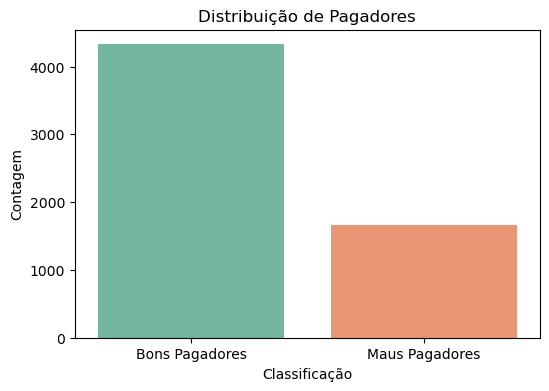

In [22]:
# Visualizar a distribuição de pagadores
plt.figure(figsize=(6,4))
sns.countplot(x='ROTULO_ALVO_MAU', data=df, palette='Set2')
plt.xticks([0,1], ['Bons Pagadores', 'Maus Pagadores'])
plt.title("Distribuição de Pagadores")
plt.xlabel("Classificação")
plt.ylabel("Contagem")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\2181499490.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ROTULO_ALVO_MAU', y='RENDA_PESSOAL_MENSAL', data=df, ax=axes[0], palette='coolwarm')
C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\2181499490.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ROTULO_ALVO_MAU', y='OUTRAS_RENDAS', data=df, ax=axes[1], palette='coolwarm')
C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\2181499490.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ROTULO_ALVO_MAU', y='IDADE', data=d

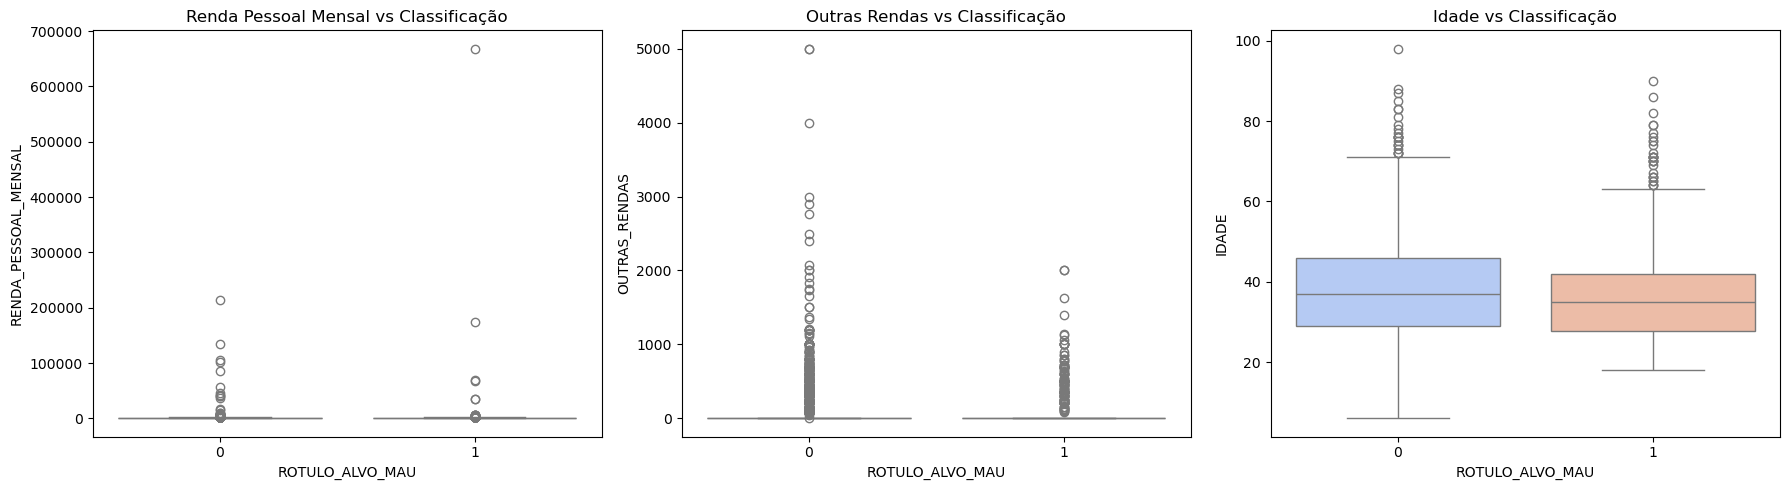

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Renda Pessoal Mensal
sns.boxplot(x='ROTULO_ALVO_MAU', y='RENDA_PESSOAL_MENSAL', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title("Renda Pessoal Mensal vs Classificação")

# Outras Rendas
sns.boxplot(x='ROTULO_ALVO_MAU', y='OUTRAS_RENDAS', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title("Outras Rendas vs Classificação")

# Idade
sns.boxplot(x='ROTULO_ALVO_MAU', y='IDADE', data=df, ax=axes[2], palette='coolwarm')
axes[2].set_title("Idade vs Classificação")

plt.tight_layout()
plt.show()


**2) Questão** Como as Features 'Sexo', 'Estado Civil', 'Quantidade de Dependentes' e 'Nível Educacional' se Relacionam com a Variável Meta?

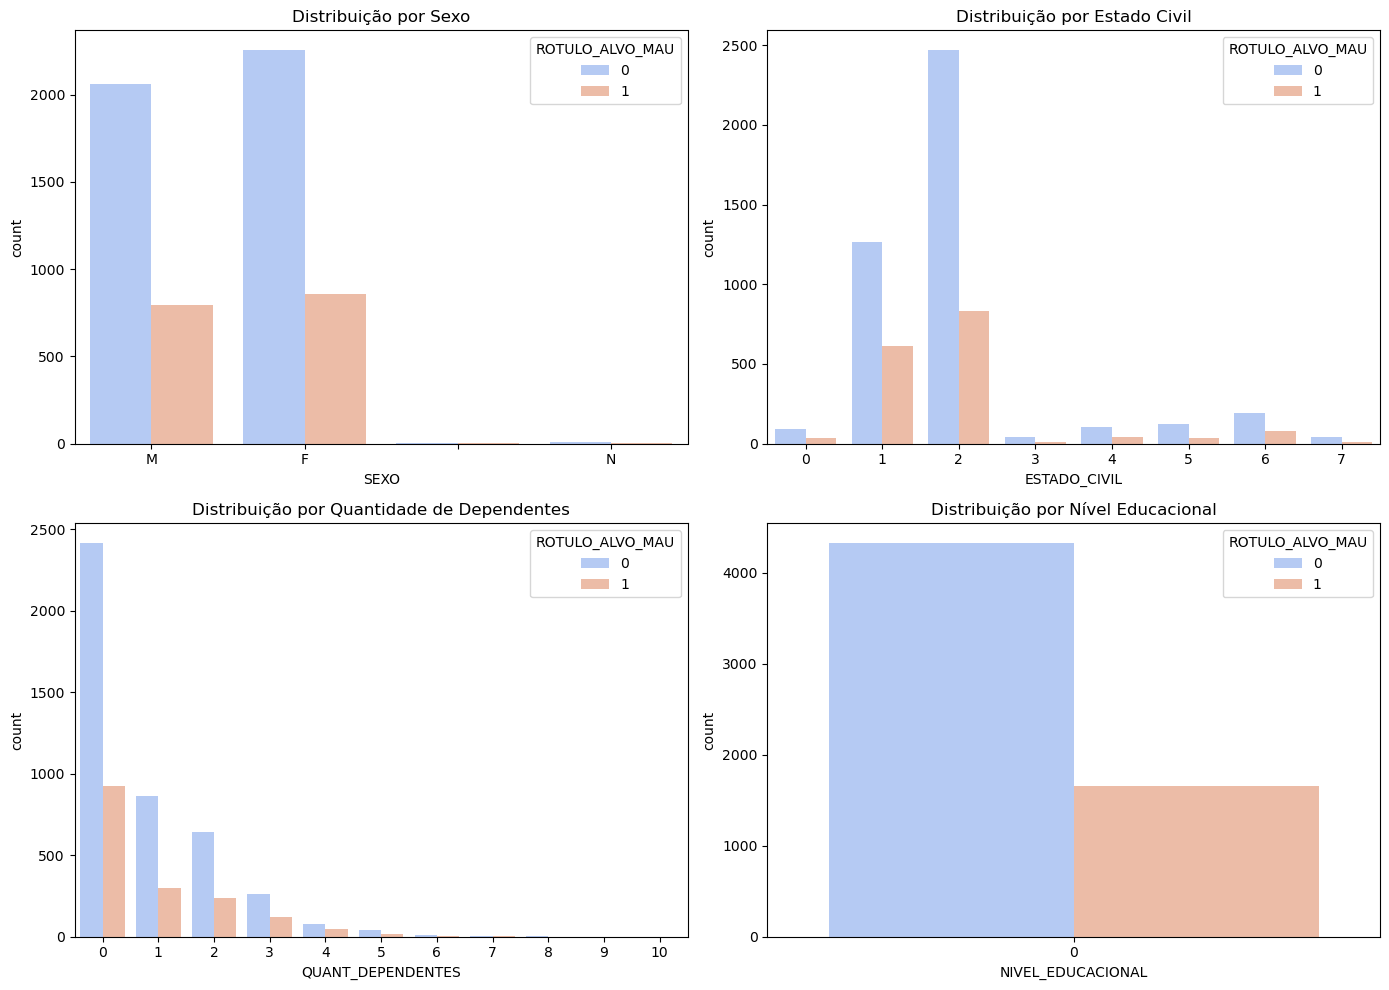

In [24]:
# Criar gráficos de barras para analisar a relação entre as variáveis categóricas e a meta
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sexo
sns.countplot(x='SEXO', hue='ROTULO_ALVO_MAU', data=df, ax=axes[0,0], palette='coolwarm')
axes[0,0].set_title("Distribuição por Sexo")

# Estado Civil
sns.countplot(x='ESTADO_CIVIL', hue='ROTULO_ALVO_MAU', data=df, ax=axes[0,1], palette='coolwarm')
axes[0,1].set_title("Distribuição por Estado Civil")

# Quantidade de Dependentes
sns.countplot(x='QUANT_DEPENDENTES', hue='ROTULO_ALVO_MAU', data=df, ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title("Distribuição por Quantidade de Dependentes")

# Nível Educacional
sns.countplot(x='NIVEL_EDUCACIONAL', hue='ROTULO_ALVO_MAU', data=df, ax=axes[1,1], palette='coolwarm')
axes[1,1].set_title("Distribuição por Nível Educacional")

plt.tight_layout()
plt.show()

**3) Questão** Distribuição de Bons e Maus Pagadores por Estado


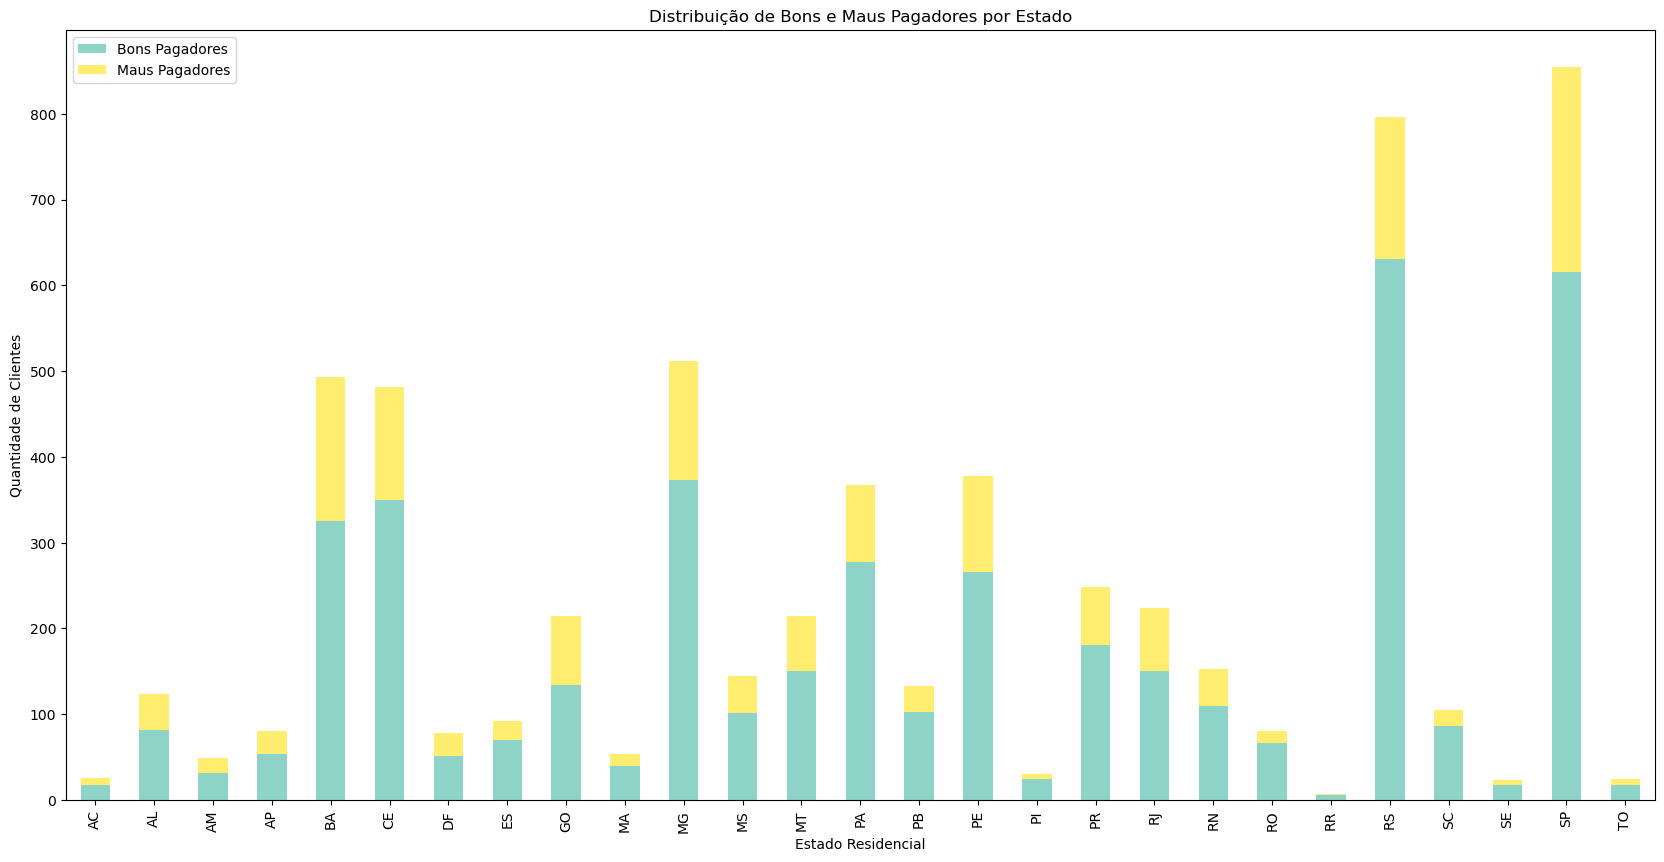

In [25]:
# Contar quantidade de bons e maus pagadores por estado
estado_counts = df.groupby("ESTADO_RESIDENCIAL")['ROTULO_ALVO_MAU'].value_counts().unstack()

# Gráfico de barras empilhadas
estado_counts.plot(kind="bar", stacked=True, figsize=(20.5, 10), colormap="Set3")
plt.title("Distribuição de Bons e Maus Pagadores por Estado")
plt.xlabel("Estado Residencial")
plt.ylabel("Quantidade de Clientes")
plt.legend(["Bons Pagadores", "Maus Pagadores"])
plt.xticks(rotation=90)
plt.show()

**4) Questão** Como o Tipo de Residência Interfere na Classificação do Pagador?

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\2075201576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TIPO_RESIDENCIA', y='ROTULO_ALVO_MAU', data=df, palette='Set2')


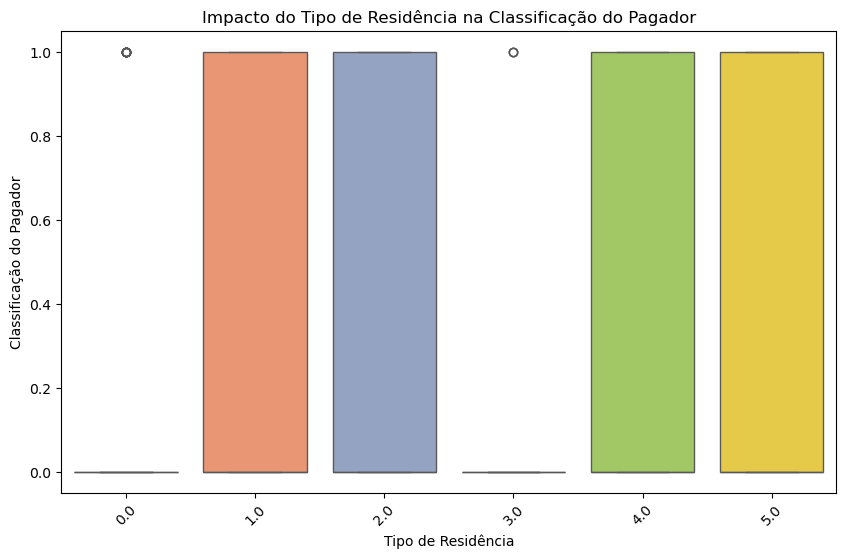

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TIPO_RESIDENCIA', y='ROTULO_ALVO_MAU', data=df, palette='Set2')
plt.title("Impacto do Tipo de Residência na Classificação do Pagador")
plt.xlabel("Tipo de Residência")
plt.ylabel("Classificação do Pagador")
plt.xticks(rotation=45)
plt.show()

**5) Questão** Como as Features 'Renda Pessoal Mensal' e 'Outras Rendas' se Relacionam com a Variável Meta? 

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\3289634063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ROTULO_ALVO_MAU', y='RENDA_PESSOAL_MENSAL', data=df, ax=axes[0], palette='Set2')
C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\3289634063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ROTULO_ALVO_MAU', y='OUTRAS_RENDAS', data=df, ax=axes[1], palette='Set2')


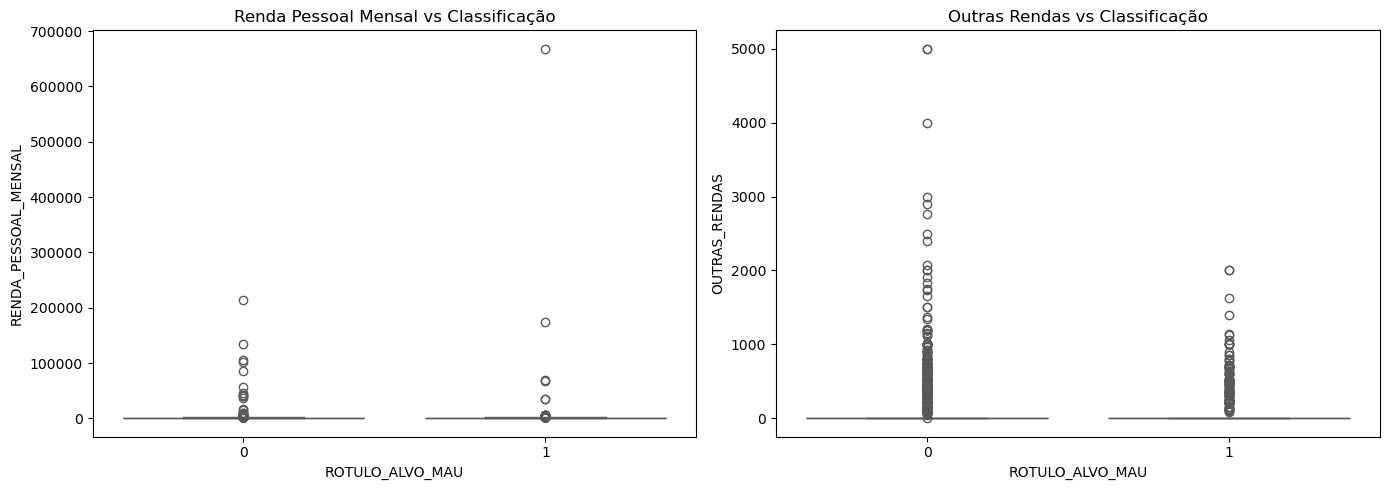

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Renda Pessoal Mensal vs Pagadores
sns.boxplot(x='ROTULO_ALVO_MAU', y='RENDA_PESSOAL_MENSAL', data=df, ax=axes[0], palette='Set2')
axes[0].set_title("Renda Pessoal Mensal vs Classificação")

# Outras Rendas vs Pagadores
sns.boxplot(x='ROTULO_ALVO_MAU', y='OUTRAS_RENDAS', data=df, ax=axes[1], palette='Set2')
axes[1].set_title("Outras Rendas vs Classificação")

plt.tight_layout()
plt.show()

**6) Questão** A Idade Interfere na Classificação do Pagador?

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\1203513011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ROTULO_ALVO_MAU', y='IDADE', data=df, palette='coolwarm')


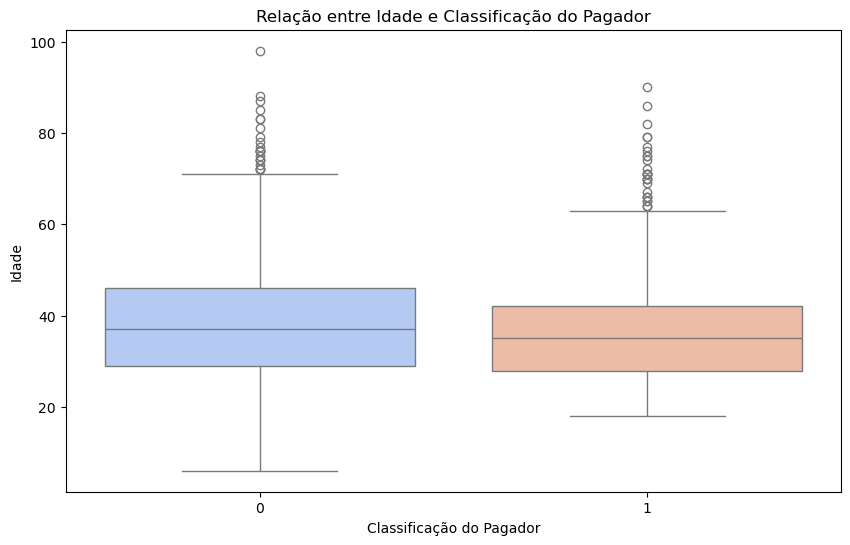

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ROTULO_ALVO_MAU', y='IDADE', data=df, palette='coolwarm')
plt.title("Relação entre Idade e Classificação do Pagador")
plt.xlabel("Classificação do Pagador")
plt.ylabel("Idade")
plt.show()

**Outros graficos**

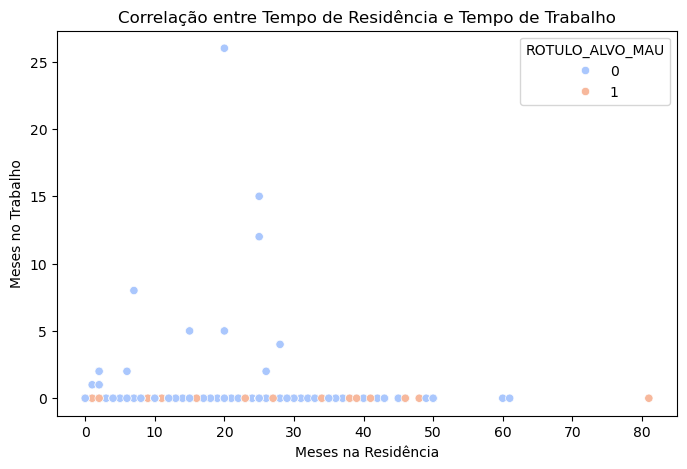

In [29]:
## Correlação entre Tempo de Residência e Tempo de Trabalho
plt.figure(figsize=(8,5))
sns.scatterplot(x='MESES_RESIDENCIA', y='MESES_NO_TRABALHO', hue='ROTULO_ALVO_MAU', data=df, palette='coolwarm')
plt.title("Correlação entre Tempo de Residência e Tempo de Trabalho")
plt.xlabel("Meses na Residência")
plt.ylabel("Meses no Trabalho")
plt.show()

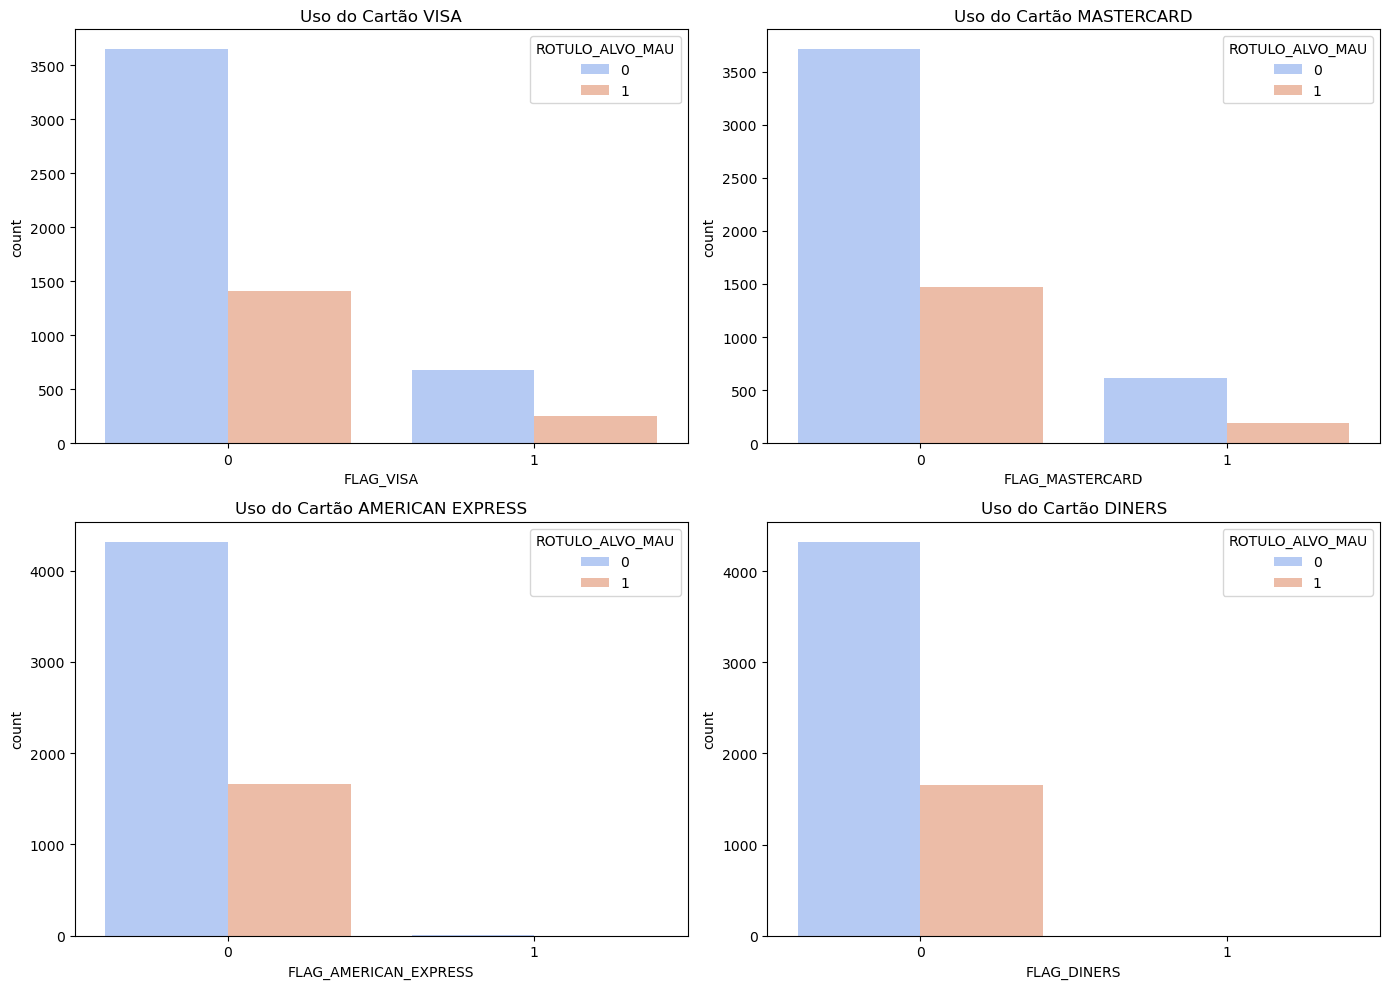

In [30]:
##  Distribuição dos Tipos de Cartões de Crédito entre Pagadores e Inadimplentes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Visa
sns.countplot(x='FLAG_VISA', hue='ROTULO_ALVO_MAU', data=df, ax=axes[0,0], palette='coolwarm')
axes[0,0].set_title("Uso do Cartão VISA")

# Mastercard
sns.countplot(x='FLAG_MASTERCARD', hue='ROTULO_ALVO_MAU', data=df, ax=axes[0,1], palette='coolwarm')
axes[0,1].set_title("Uso do Cartão MASTERCARD")

# American Express
sns.countplot(x='FLAG_AMERICAN_EXPRESS', hue='ROTULO_ALVO_MAU', data=df, ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title("Uso do Cartão AMERICAN EXPRESS")

# Diners
sns.countplot(x='FLAG_DINERS', hue='ROTULO_ALVO_MAU', data=df, ax=axes[1,1], palette='coolwarm')
axes[1,1].set_title("Uso do Cartão DINERS")

plt.tight_layout()
plt.show()

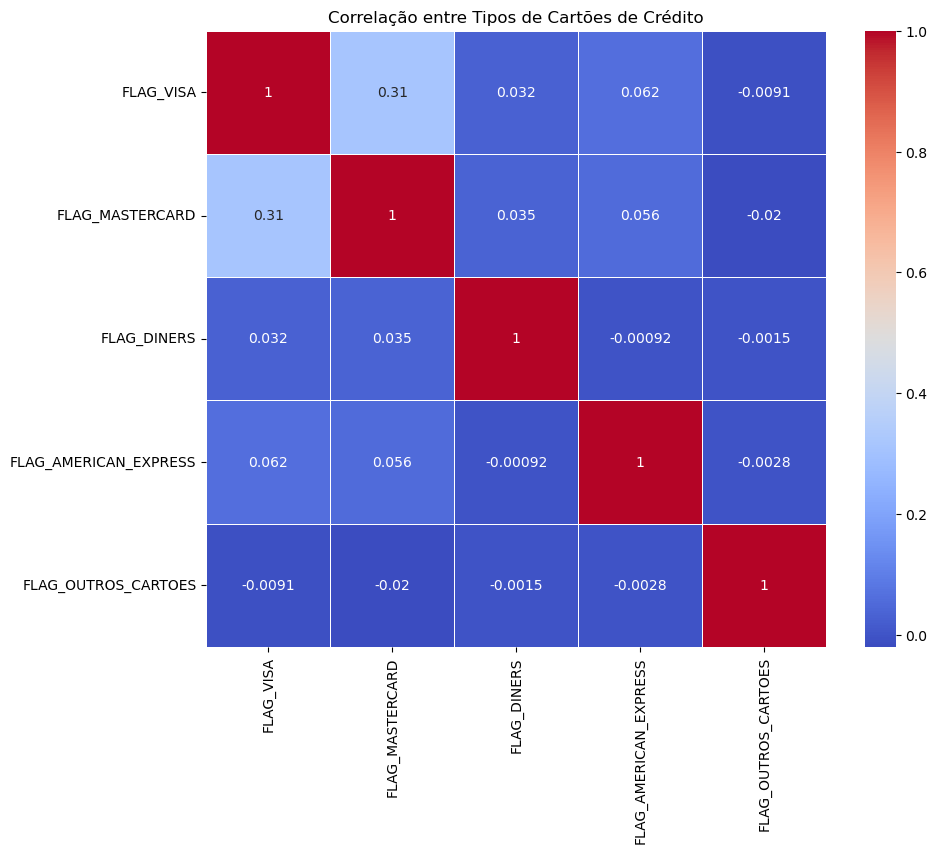

In [31]:
## 1. Heatmap de Correlação entre Cartões de Crédito
cartao_cols = ['FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OUTROS_CARTOES']

plt.figure(figsize=(10,8))
sns.heatmap(df[cartao_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlação entre Tipos de Cartões de Crédito")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\3308320370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL_CARTOES'] = df[cartao_cols].sum(axis=1)  # Soma dos cartões que o cliente possui
C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\3308320370.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:dodgerblue'` for the same effect.

  sns.countplot(x='TOTAL_CARTOES', hue='ROTULO_ALVO_MAU', data=df, color="dodgerblue")


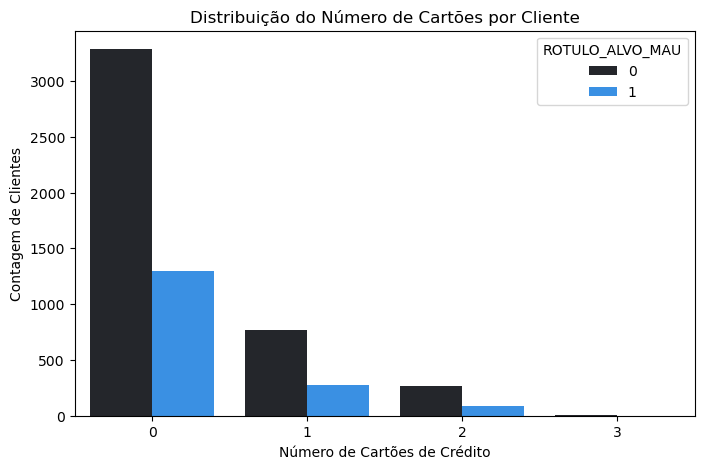

In [32]:
## 2. Distribuição do Número Total de Cartões por Cliente
df['TOTAL_CARTOES'] = df[cartao_cols].sum(axis=1)  # Soma dos cartões que o cliente possui

plt.figure(figsize=(8,5))
sns.countplot(x='TOTAL_CARTOES', hue='ROTULO_ALVO_MAU', data=df, color="dodgerblue")
plt.title("Distribuição do Número de Cartões por Cliente")
plt.xlabel("Número de Cartões de Crédito")
plt.ylabel("Contagem de Clientes")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\3949518120.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="TOTAL_CARTOES", y="ROTULO_ALVO_MAU", data=df, ci=None, color="dodgerblue")


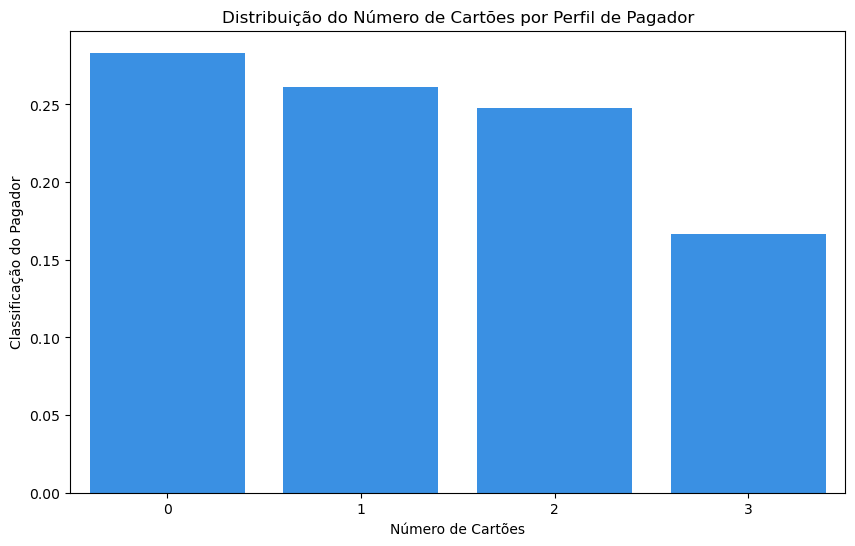

In [33]:
## 3. Relação entre Tipos de Cartões e Inadimplência (Gráfico de Ligação)
plt.figure(figsize=(10,6))
sns.barplot(x="TOTAL_CARTOES", y="ROTULO_ALVO_MAU", data=df, ci=None, color="dodgerblue")
plt.title("Distribuição do Número de Cartões por Perfil de Pagador")
plt.xlabel("Número de Cartões")
plt.ylabel("Classificação do Pagador")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\1738461198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TOTAL_CARTOES', y='ROTULO_ALVO_MAU', data=df, palette="coolwarm")


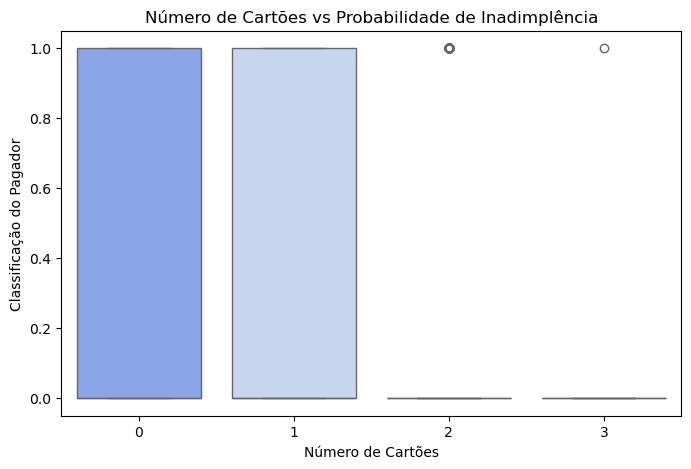

In [34]:
## Clientes com Muitos Cartões e Alta Inadimplência
plt.figure(figsize=(8,5))
sns.boxplot(x='TOTAL_CARTOES', y='ROTULO_ALVO_MAU', data=df, palette="coolwarm")
plt.title("Número de Cartões vs Probabilidade de Inadimplência")
plt.xlabel("Número de Cartões")
plt.ylabel("Classificação do Pagador")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\165369580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL_CARTOES'] = df[['FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OUTROS_CARTOES']].sum(axis=1)


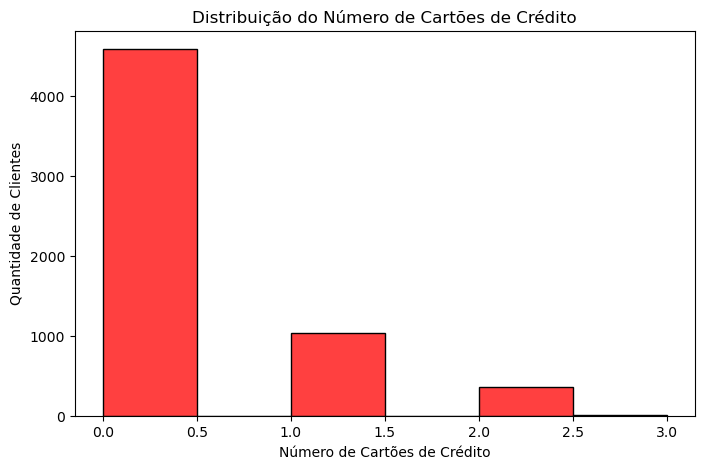

In [35]:
# Nova coluna com a quantidade total de cartões de crédito que o cliente possui
df['TOTAL_CARTOES'] = df[['FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OUTROS_CARTOES']].sum(axis=1)

## Distribuição de Clientes com Múltiplos Cartões de Crédito
plt.figure(figsize=(8,5))
sns.histplot(df['TOTAL_CARTOES'], bins=6, kde=False, color="red")
plt.title("Distribuição do Número de Cartões de Crédito")
plt.xlabel("Número de Cartões de Crédito")
plt.ylabel("Quantidade de Clientes")
plt.show()

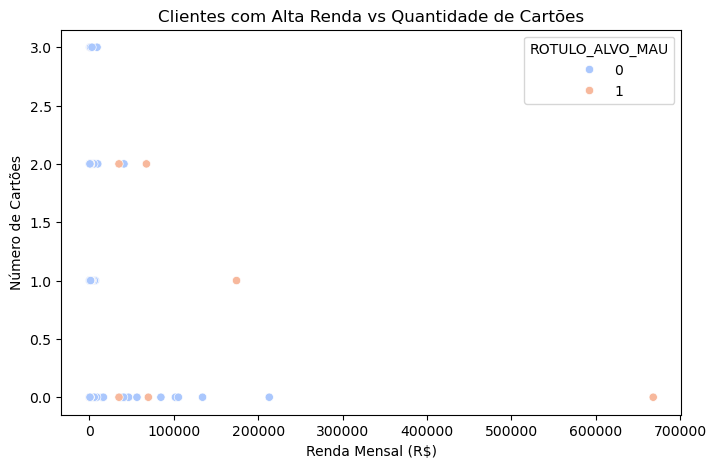

In [36]:
## Distribuição de Clientes com Alta Renda vs Muitos Cartões (Possível Fraude)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['RENDA_PESSOAL_MENSAL'], y=df['TOTAL_CARTOES'], hue=df['ROTULO_ALVO_MAU'], palette="coolwarm")
plt.title("Clientes com Alta Renda vs Quantidade de Cartões")
plt.xlabel("Renda Mensal (R$)")
plt.ylabel("Número de Cartões")
plt.show()

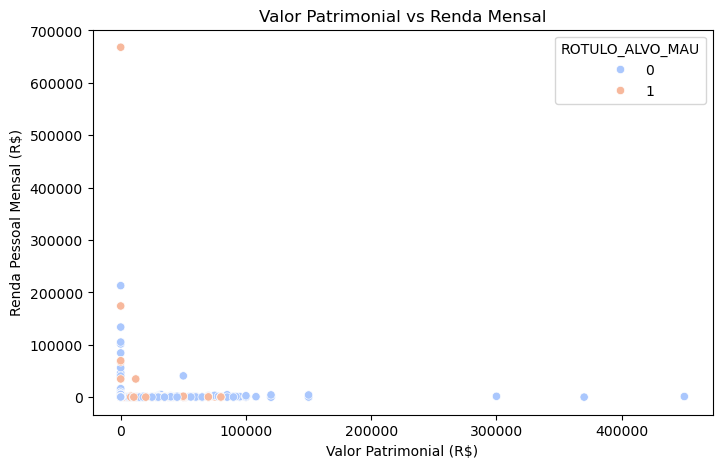

In [37]:
## Comparação de Valor Patrimonial vs Renda Pessoal
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['VALOR_PATRIMONIO_PESSOAL'], y=df['RENDA_PESSOAL_MENSAL'], hue=df['ROTULO_ALVO_MAU'], palette="coolwarm")
plt.title("Valor Patrimonial vs Renda Mensal")
plt.xlabel("Valor Patrimonial (R$)")
plt.ylabel("Renda Pessoal Mensal (R$)")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\3952846838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ROTULO_ALVO_MAU', y='VALOR_PATRIMONIO_PESSOAL', data=df, palette="coolwarm")


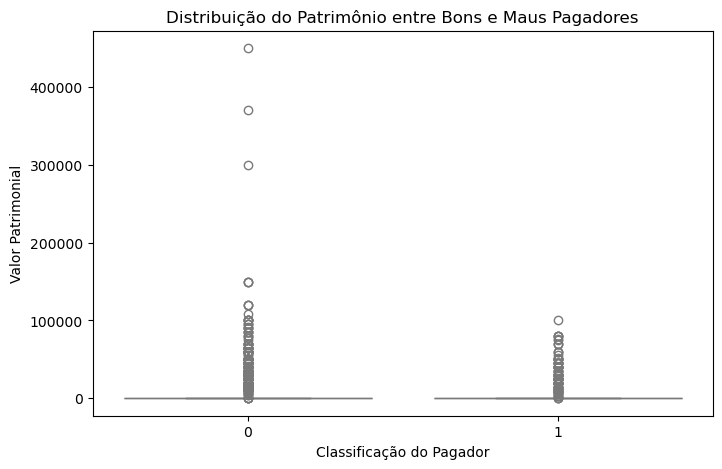

In [38]:
## Clientes com Pouca Renda e Alto Patrimônio (Fraude?)
plt.figure(figsize=(8,5))
sns.boxplot(x='ROTULO_ALVO_MAU', y='VALOR_PATRIMONIO_PESSOAL', data=df, palette="coolwarm")
plt.title("Distribuição do Patrimônio entre Bons e Maus Pagadores")
plt.xlabel("Classificação do Pagador")
plt.ylabel("Valor Patrimonial")
plt.show()

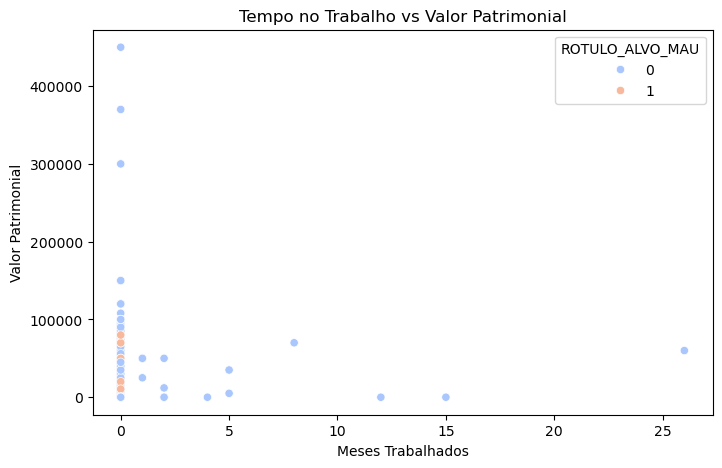

In [39]:
## Relação entre Tempo no Trabalho e Alto Valor de Crédito
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['MESES_NO_TRABALHO'], y=df['VALOR_PATRIMONIO_PESSOAL'], hue=df['ROTULO_ALVO_MAU'], palette="coolwarm")
plt.title("Tempo no Trabalho vs Valor Patrimonial")
plt.xlabel("Meses Trabalhados")
plt.ylabel("Valor Patrimonial")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_59292\1776070680.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FAIXA_ETARIA"] = pd.cut(df["IDADE"], bins=[18, 25, 35, 45, 55, 65, 100], labels=["18-25", "26-35", "36-45", "46-55", "56-65", "65+"])


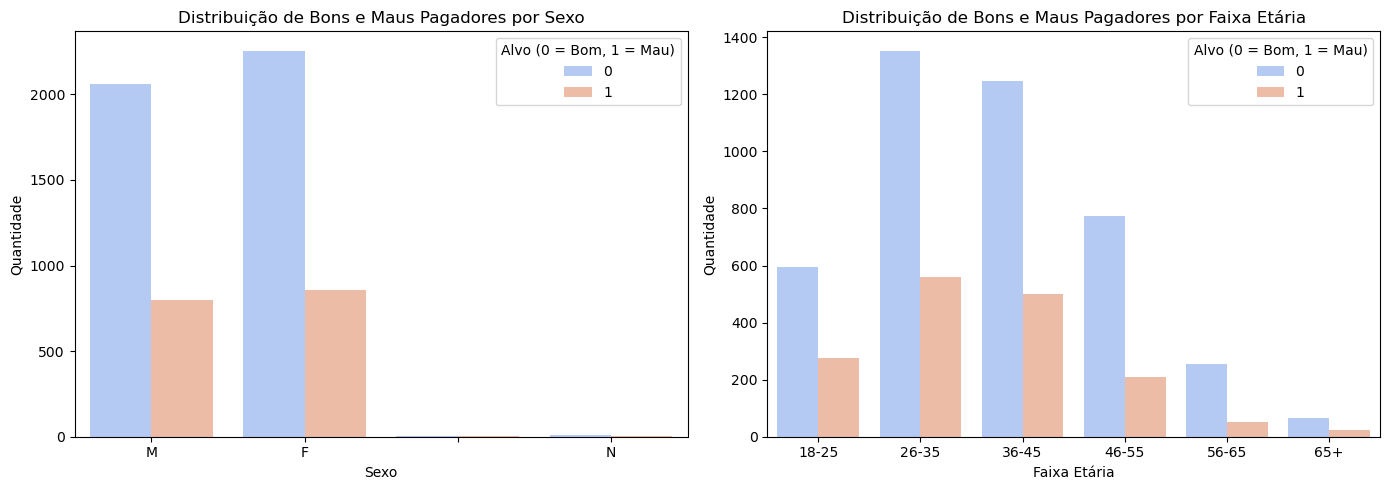

In [40]:
# Gráficos barras para analisar a relação entre Sexo, Idade e a variável alvo (ROTULO_ALVO_MAU)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 📌 Gráfico de barras para Sexo x ROTULO_ALVO_MAU
sns.countplot(data=df, x="SEXO", hue="ROTULO_ALVO_MAU", ax=axes[0], palette="coolwarm")
axes[0].set_title("Distribuição de Bons e Maus Pagadores por Sexo")
axes[0].set_xlabel("Sexo")
axes[0].set_ylabel("Quantidade")
axes[0].legend(title="Alvo (0 = Bom, 1 = Mau)")

# 📌 Gráfico de barras para Faixas Etárias x ROTULO_ALVO_MAU
df["FAIXA_ETARIA"] = pd.cut(df["IDADE"], bins=[18, 25, 35, 45, 55, 65, 100], labels=["18-25", "26-35", "36-45", "46-55", "56-65", "65+"])

sns.countplot(data=df, x="FAIXA_ETARIA", hue="ROTULO_ALVO_MAU", ax=axes[1], palette="coolwarm")
axes[1].set_title("Distribuição de Bons e Maus Pagadores por Faixa Etária")
axes[1].set_xlabel("Faixa Etária")
axes[1].set_ylabel("Quantidade")
axes[1].legend(title="Alvo (0 = Bom, 1 = Mau)")

plt.tight_layout()
plt.show()

**Análise de outlers**

In [41]:
# Selecionar apenas colunas numéricas
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Detecção de Outliers usando o método IQR (Interquartile Range)
outliers_dict = {}

for col in df_numerical.columns:
    Q1 = np.percentile(df_numerical[col], 25)  # Primeiro quartil
    Q3 = np.percentile(df_numerical[col], 75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_numerical[(df_numerical[col] < lower_bound) | (df_numerical[col] > upper_bound)]
    
    # Armazena a contagem de outliers por variável
    outliers_dict[col] = len(outliers)

# Exibir quantos outliers foram encontrados em cada variável numérica
print("\n Contagem de Outliers por Variável:")
print()
for key, value in outliers_dict.items():
    print()
    print(f"{key}: {value} outliers")


 Contagem de Outliers por Variável:


ID_CLIENTE: 0 outliers

DIA_PAGAMENTO: 1003 outliers

QUANT_CARTOES_ADICIONAIS: 0 outliers

TIPO_ENDERECO_POSTAL: 109 outliers

ESTADO_CIVIL: 628 outliers

QUANT_DEPENDENTES: 601 outliers

NIVEL_EDUCACIONAL: 0 outliers

NACIONALIDADE: 1172 outliers

TIPO_RESIDENCIA: 1054 outliers

MESES_RESIDENCIA: 314 outliers

FLAG_EMAIL: 0 outliers

RENDA_PESSOAL_MENSAL: 450 outliers

OUTRAS_RENDAS: 421 outliers

FLAG_VISA: 928 outliers

FLAG_MASTERCARD: 804 outliers

FLAG_DINERS: 3 outliers

FLAG_AMERICAN_EXPRESS: 10 outliers

FLAG_OUTROS_CARTOES: 28 outliers

QUANT_CONTAS_BANCARIAS: 814 outliers

QUANT_CONTAS_BANCARIAS_ESPECIAIS: 814 outliers

VALOR_PATRIMONIO_PESSOAL: 420 outliers

QUANT_CARROS: 397 outliers

MESES_NO_TRABALHO: 14 outliers

CODIGO_PROFISSAO: 1166 outliers

TIPO_OCUPACAO: 1503 outliers

CODIGO_PROFISSAO_CONJUGE: 0 outliers

NIVEL_EDUCACIONAL_CONJUGE: 660 outliers

FLAG_DOCUMENTO_RESIDENCIAL: 0 outliers

FLAG_RG: 0 outliers

FLAG_CPF: 0 outlie

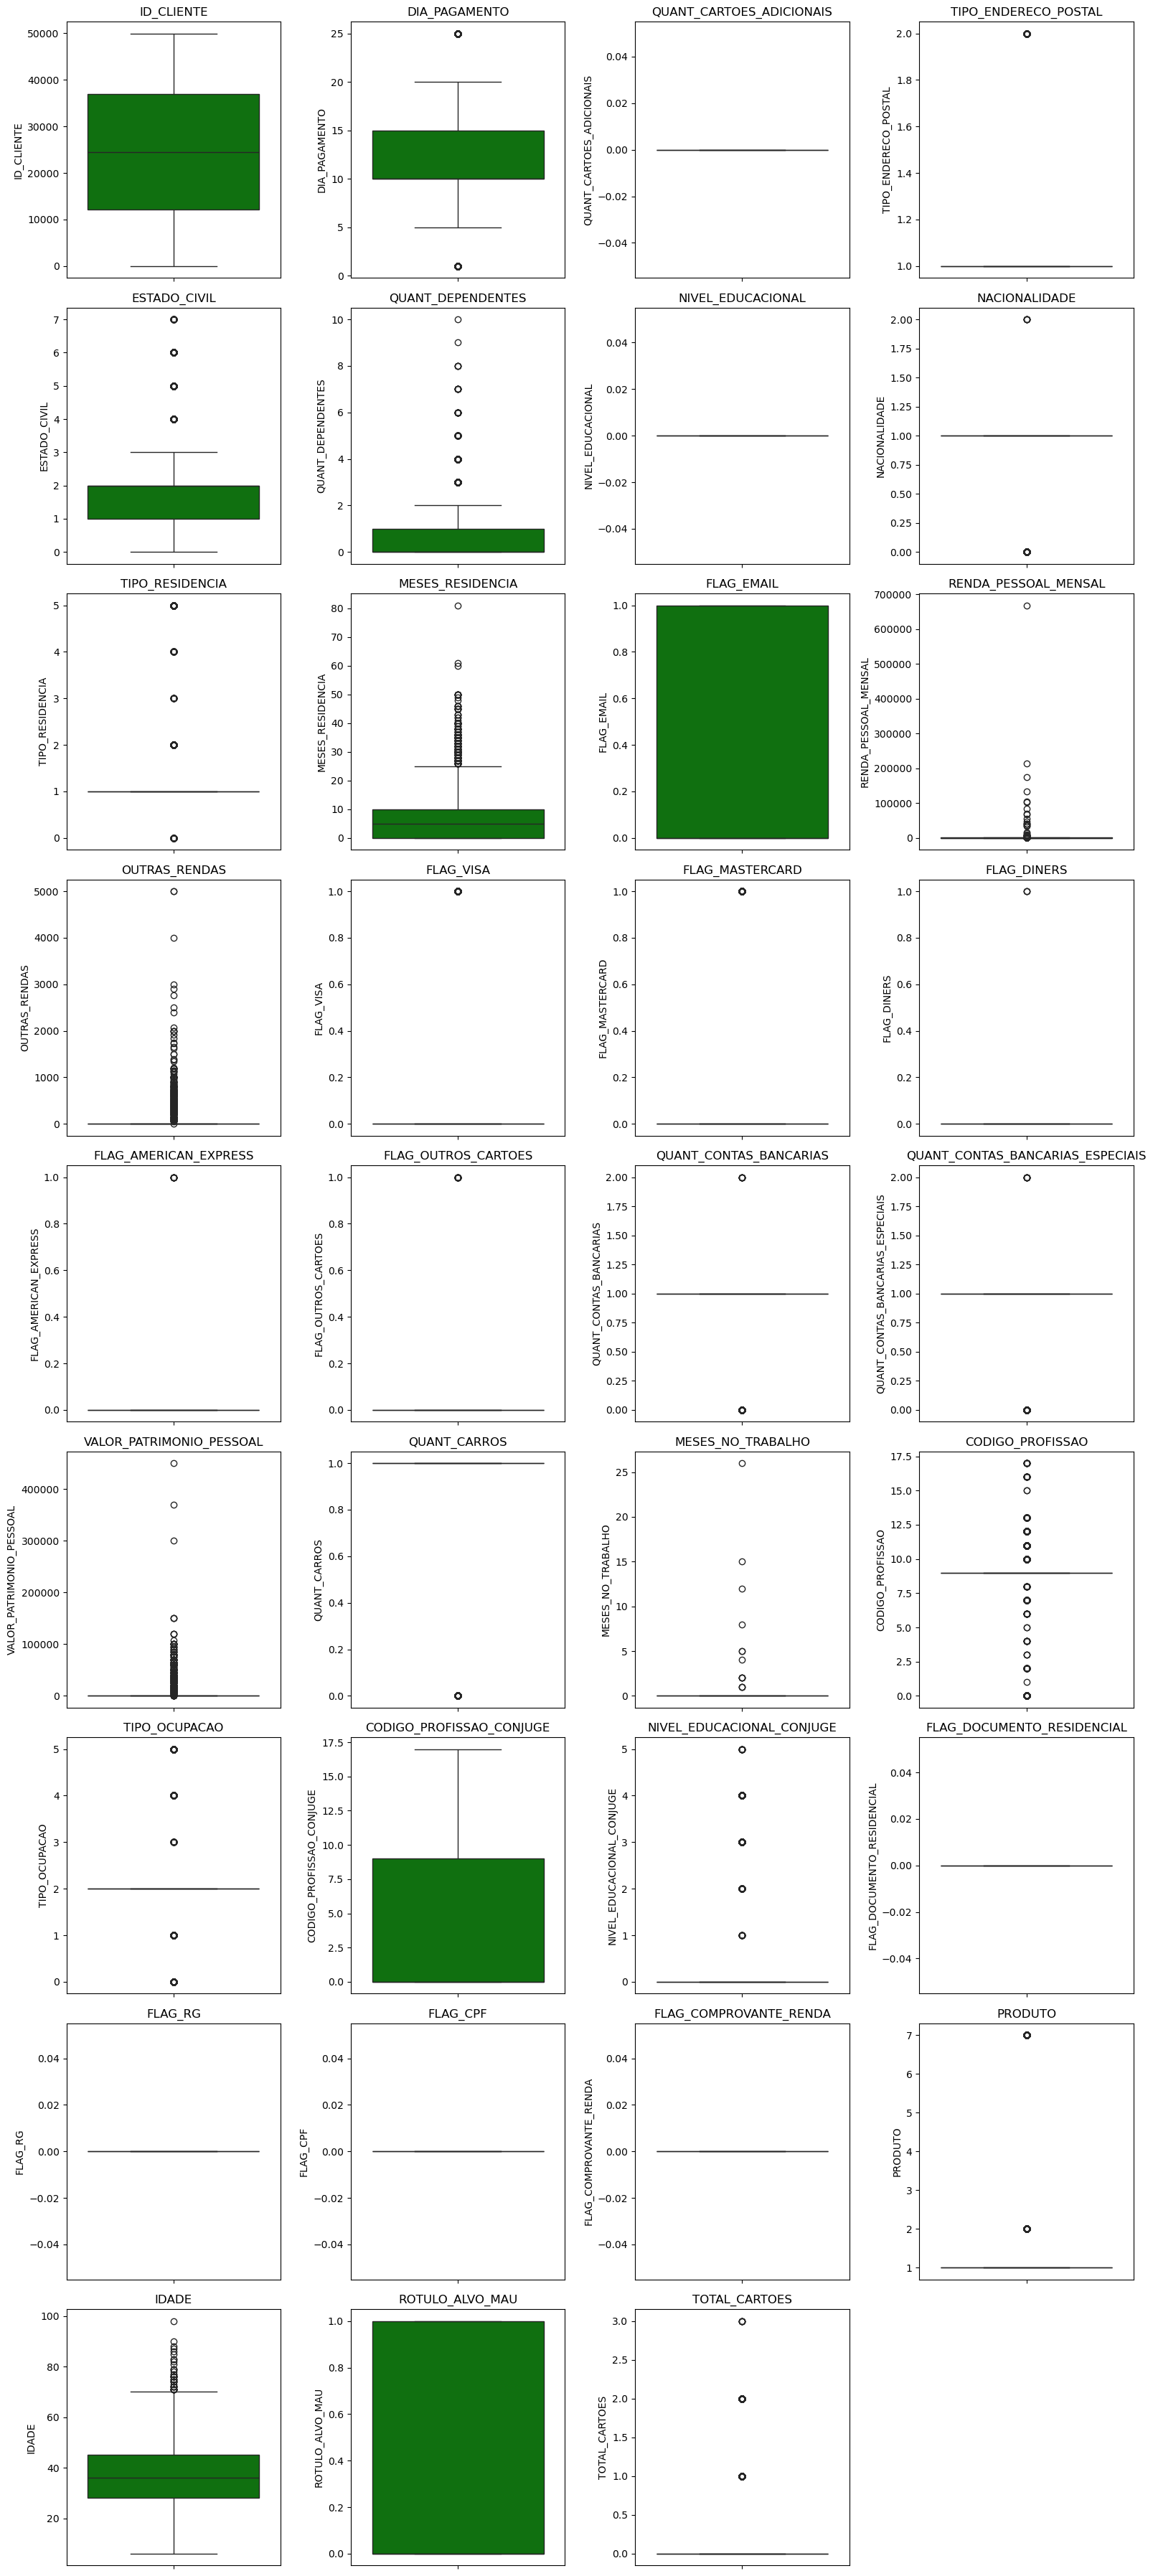

In [42]:
# Selecionar apenas colunas numéricas
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Contar quantas variáveis numéricas existem
num_vars = len(df_numerical.columns)

# Ajustar dinamicamente o número de linhas e colunas nos subplots
num_cols = 4  # Número de colunas fixo para uma boa visualização
num_rows = -(-num_vars // num_cols)  # Cálculo para determinar linhas suficientes

# Criar a figura para os boxplots
plt.figure(figsize=(16, num_rows * 4))

# Criar um boxplot para cada variável numérica
for i, col in enumerate(df_numerical.columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Ajustar layout automaticamente
    sns.boxplot(y=df_numerical[col], color="green")
    plt.title(col)

plt.tight_layout()
plt.show()

**Remover Outliers Extremos (Método IQR)**

In [43]:
# Criar cópia do DataFrame para evitar alterações diretas
df_cleaned = df.copy()

# Lista de colunas com outliers identificados
outlier_columns = ["DIA_PAGAMENTO", "TIPO_ENDERECO_POSTAL", "ESTADO_CIVIL", "QUANT_DEPENDENTES",
                   "NACIONALIDADE", "TIPO_RESIDENCIA", "MESES_RESIDENCIA", "RENDA_PESSOAL_MENSAL",
                   "OUTRAS_RENDAS", "FLAG_VISA", "FLAG_MASTERCARD", "FLAG_DINERS",
                   "FLAG_AMERICAN_EXPRESS", "FLAG_OUTROS_CARTOES", "QUANT_CONTAS_BANCARIAS",
                   "QUANT_CONTAS_BANCARIAS_ESPECIAIS", "VALOR_PATRIMONIO_PESSOAL",
                   "QUANT_CARROS", "MESES_NO_TRABALHO", "CODIGO_PROFISSAO", "TIPO_OCUPACAO",
                   "NIVEL_EDUCACIONAL_CONJUGE", "PRODUTO", "IDADE"]

# Aplicar método IQR para remover outliers
for col in outlier_columns:
    Q1 = np.percentile(df_cleaned[col], 25)
    Q3 = np.percentile(df_cleaned[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Verificar quantos dados foram removidos
print(f"\n Dados antes da remoção: {df.shape[0]}")
print(f" Dados depois da remoção: {df_cleaned.shape[0]}")


 Dados antes da remoção: 5987
 Dados depois da remoção: 802


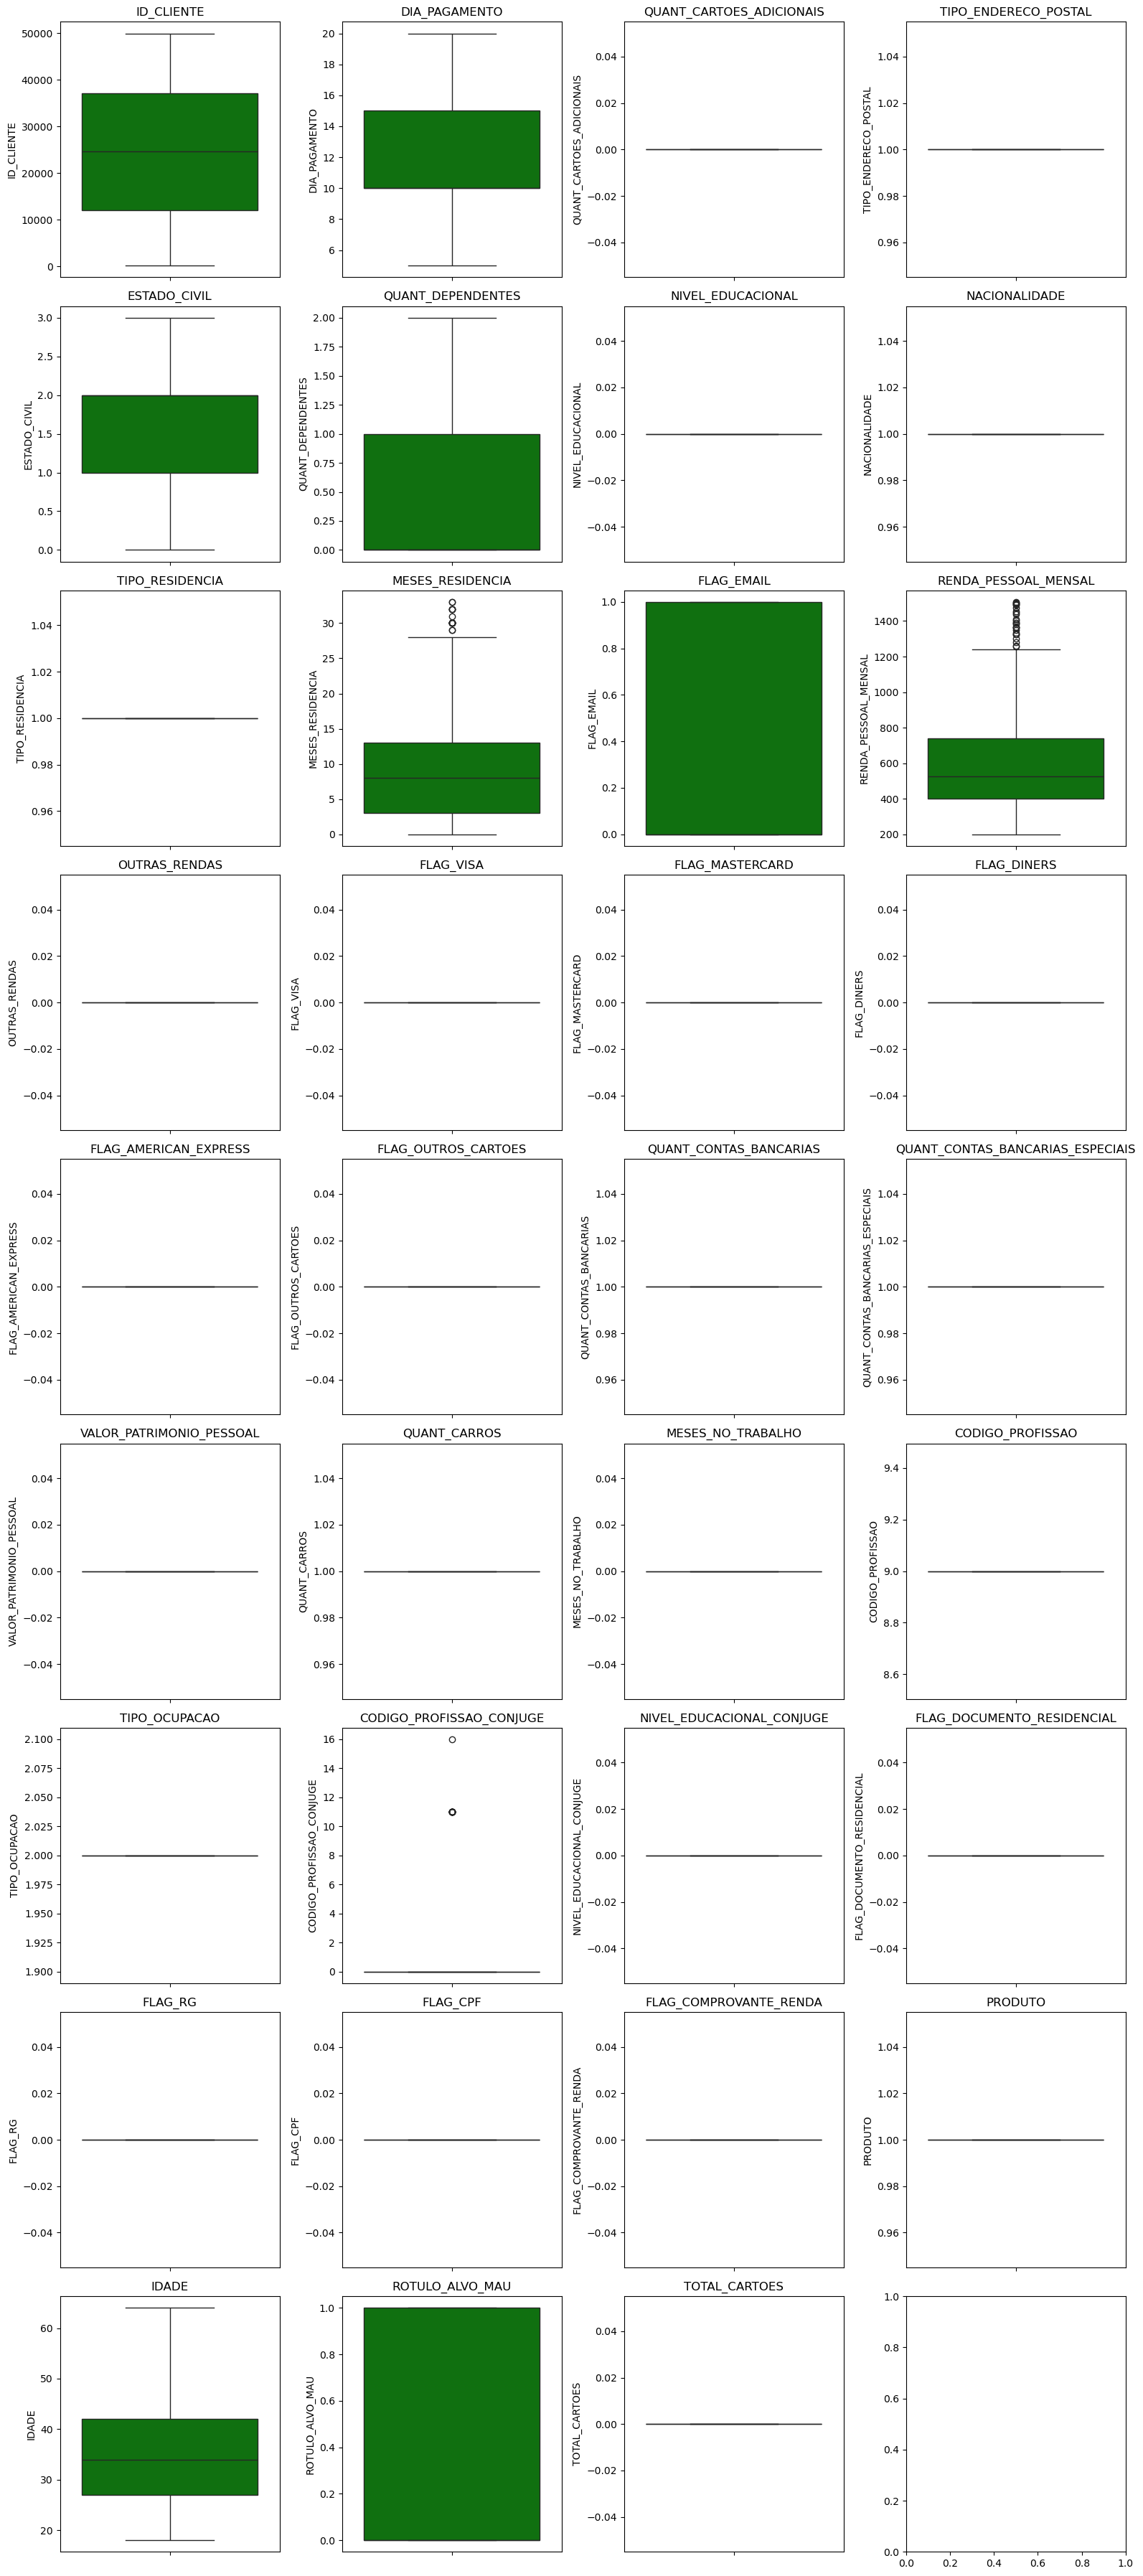

In [44]:
# Selecionar apenas colunas numéricas do dataframe limpo
df_cleaned_numerical = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Ajustar dinamicamente o número de linhas e colunas para os subplots
# Número de colunas fixo para boa visualização
num_cols = 4  
num_vars = len(df_cleaned_numerical.columns)

# Cálculo para determinar linhas suficientes
num_rows = -(-num_vars // num_cols)  

# Criar figura para os boxplots antes e depois da remoção dos outliers
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Criar um boxplot para cada variável numérica depois da remoção de outliers
for i, col in enumerate(df_cleaned_numerical.columns):
    row, col_num = divmod(i, num_cols)  # Determinar posição do subplot
    sns.boxplot(y=df_cleaned_numerical[col], color="green", ax=axes[row, col_num])
    axes[row, col_num].set_title(col)

# Ajustar layout
plt.tight_layout()
plt.show()

# Modelagem machine learning

In [45]:
# Identificar colunas categóricas (não numéricas)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\n Colunas categóricas identificadas:", categorical_cols)


 Colunas categóricas identificadas: ['TIPO_FUNCIONARIO', 'TIPO_ENVIO_APLICACAO', 'SEXO', 'ESTADO_NASCIMENTO', 'CIDADE_NASCIMENTO', 'ESTADO_RESIDENCIAL', 'CIDADE_RESIDENCIAL', 'BAIRRO_RESIDENCIAL', 'FLAG_TELEFONE_RESIDENCIAL', 'CODIGO_AREA_TELEFONE_RESIDENCIAL', 'FLAG_TELEFONE_MOVEL', 'EMPRESA', 'ESTADO_PROFISSIONAL', 'CIDADE_PROFISSIONAL', 'BAIRRO_PROFISSIONAL', 'FLAG_TELEFONE_PROFISSIONAL', 'CODIGO_AREA_TELEFONE_PROFISSIONAL', 'FLAG_REGISTRO_ACSP', 'CEP_RESIDENCIAL', 'CEP_RESIDENCIAL_3']


In [46]:
from sklearn.preprocessing import LabelEncoder

# Identificar colunas categóricas (excluindo as numéricas e os CEPs)
categorical_cols = ['TIPO_FUNCIONARIO', 'TIPO_ENVIO_APLICACAO', 'SEXO', 'ESTADO_NASCIMENTO', 'CIDADE_NASCIMENTO',
                    'ESTADO_RESIDENCIAL', 'CIDADE_RESIDENCIAL', 'BAIRRO_RESIDENCIAL', 'FLAG_TELEFONE_RESIDENCIAL',
                    'CODIGO_AREA_TELEFONE_RESIDENCIAL', 'FLAG_TELEFONE_MOVEL', 'EMPRESA', 'ESTADO_PROFISSIONAL',
                    'CIDADE_PROFISSIONAL', 'FLAG_TELEFONE_PROFISSIONAL', 'CODIGO_AREA_TELEFONE_PROFISSIONAL',
                    'FLAG_REGISTRO_ACSP']

# Dicionário para armazenar os encoders 
label_encoders = {}

# Aplicar Label Encoding para colunas categóricas
for col in categorical_cols:

    # Converter para string para evitar erro de tipo
    df.loc[:, col] = df[col].astype(str)  
    le = LabelEncoder()

    # Aplicar Label Encoding
    df.loc[:, col] = le.fit_transform(df[col])  
    
    # Guardar o encoder para referência futura
    label_encoders[col] = le

le

LabelEncoder()

In [54]:
# Remover colunas de CEPs (não devem ser convertidas em numéricas)
df = df.drop(columns=['CEP_RESIDENCIAL', 'CEP_RESIDENCIAL_3', 'TOTAL_CARTOES', 'FAIXA_ETARIA'])

# Visualizando dataset
df

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,ROTULO_ALVO_MAU
5,6,0,10,0,0,1,2,2,0,0,...,0.0,0.0,0,0,0,0,2,0,40,1
9,10,0,5,0,0,1,1,1,0,0,...,11.0,0.0,0,0,0,0,1,0,41,0
13,14,0,25,0,0,1,1,2,2,0,...,0.0,0.0,0,0,0,0,1,0,36,0
17,18,0,10,0,0,1,1,1,0,0,...,0.0,0.0,0,0,0,0,1,0,32,0
24,25,0,10,0,0,1,1,5,0,0,...,0.0,0.0,0,0,0,0,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49969,49970,0,15,0,0,1,1,1,1,0,...,0.0,0.0,0,0,0,0,1,0,18,1
49972,49973,0,5,0,0,1,2,2,2,0,...,0.0,0.0,0,0,0,0,1,0,34,0
49978,49979,0,10,0,0,1,2,0,0,0,...,11.0,0.0,0,0,0,0,1,0,21,1
49979,49980,0,10,0,0,1,1,1,0,0,...,11.0,0.0,0,0,0,0,1,0,27,0


# Divisão treino e teste modelo

In [56]:
X = df.drop('ROTULO_ALVO_MAU', axis=1)
y = df['ROTULO_ALVO_MAU']

In [57]:
# Visualizando dados x
X.shape

(5987, 51)

In [58]:
# Visualizando dados y
y.shape

(5987,)

# Treinamento modelo

In [59]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizando linhas e colunas do X_train
print("Visualizando dados do trem X:", X_train.shape)

# Visualizando linhas e colunas do y_train
print("Visualizando dados do trem y:", y_train.shape)

Visualizando dados do trem X: (4789, 51)
Visualizando dados do trem y: (4789,)


In [60]:
# Criar um dicionário para armazenar os LabelEncoders
label_encoders = {}

# Identificar colunas categóricas
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Aplicar Label Encoding para cada coluna categórica
for col in categorical_cols:
    le = LabelEncoder()
    
    # Ajuste (fit) no treino e transformação (transform) no treino
    X_train[col] = le.fit_transform(X_train[col])
    
    # Salvar o encoder treinado
    label_encoders[col] = le
    
    # Verificar se existem valores desconhecidos em X_test e substituí-los
    X_test[col] = X_test[col].apply(lambda x: x if x in le.classes_ else "UNKNOWN")
    
    # Ajuste (fit) no encoder para incluir a categoria UNKNOWN
    le.classes_ = np.append(le.classes_, "UNKNOWN")
    
    # Transformação (transform) no teste
    X_test[col] = le.transform(X_test[col])

# Verificar se os dados agora são numéricos
print("\n Tipos de Dados Após Transformação:")
print(X_train.dtypes)


 Tipos de Dados Após Transformação:
ID_CLIENTE                             int64
TIPO_FUNCIONARIO                       int32
DIA_PAGAMENTO                          int64
TIPO_ENVIO_APLICACAO                   int32
QUANT_CARTOES_ADICIONAIS               int64
TIPO_ENDERECO_POSTAL                   int64
SEXO                                   int32
ESTADO_CIVIL                           int64
QUANT_DEPENDENTES                      int64
NIVEL_EDUCACIONAL                      int64
ESTADO_NASCIMENTO                      int32
CIDADE_NASCIMENTO                      int32
NACIONALIDADE                          int64
ESTADO_RESIDENCIAL                     int32
CIDADE_RESIDENCIAL                     int32
BAIRRO_RESIDENCIAL                     int32
FLAG_TELEFONE_RESIDENCIAL              int32
CODIGO_AREA_TELEFONE_RESIDENCIAL       int32
TIPO_RESIDENCIA                      float64
MESES_RESIDENCIA                     float64
FLAG_TELEFONE_MOVEL                    int32
FLAG_EMAIL        

# Modelo machine learning

In [61]:
%%time

# Importing libraries for various classification models and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 7. List of models to be evaluated
models = [
    
    # Naive Bayes model (good for small datasets, assumes independence between features)
    GaussianNB(),
    
    # Decision Tree model (simple and interpretable, prone to overfitting)
    DecisionTreeClassifier(random_state=42),

    # Random Forest (ensemble of decision trees, reduces overfitting and improves accuracy)
    RandomForestClassifier(n_estimators=100, random_state=42),
    
    # Logistic Regression (linear model, great for binary classification problems)
    LogisticRegression(random_state=50, max_iter=1000)
]

# 8. Loop through each model and evaluate performance on training and test data
for i, model in enumerate(models):
    
    # Train the model on the training dataset
    model.fit(X_train, y_train)
   
    # Calculate the training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
   
    # Calculate the testing accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))   

    # Print the model's name and accuracy on training and testing datasets
    print("-----------------")
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")
    print()

-----------------

Model 1: GaussianNB
Training Accuracy: 0.6648569638755482
Testing Accuracy: 0.6243739565943238
-----------------

-----------------

Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.5801335559265443
-----------------

-----------------

Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.7178631051752922
-----------------

-----------------

Model 4: LogisticRegression
Training Accuracy: 0.7226978492378368
Testing Accuracy: 0.7253756260434057
-----------------

CPU times: total: 2.41 s
Wall time: 1.91 s


C:\Users\rafae\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Random Forest...


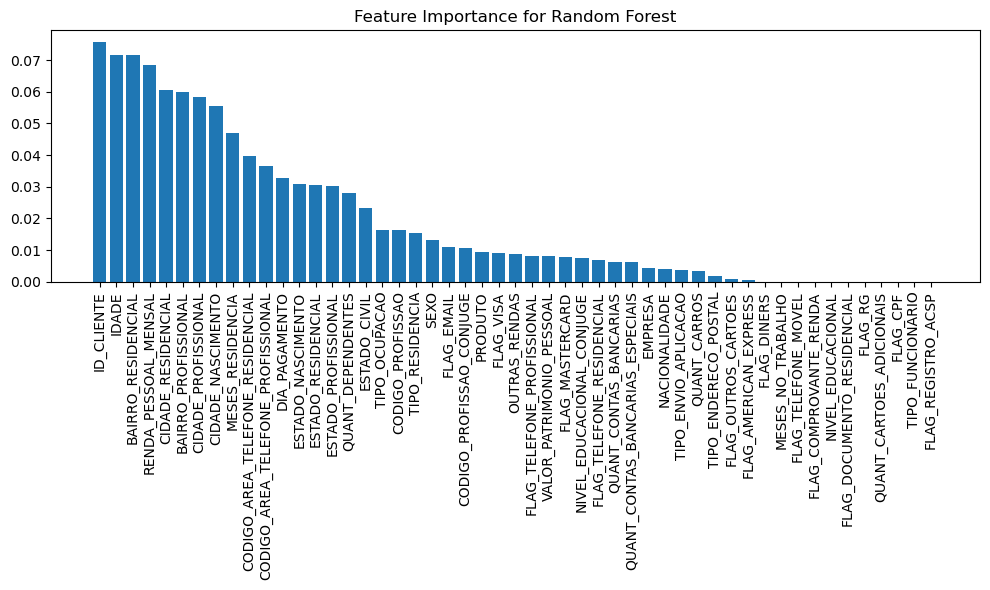

------------------------------------------------------------
Training Logistic Regression...


C:\Users\rafae\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


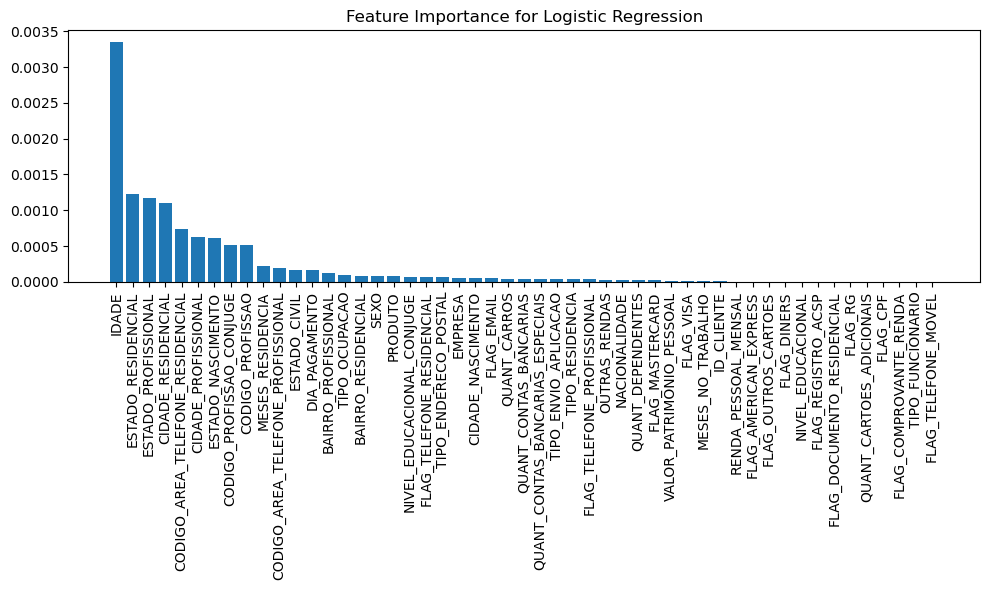

------------------------------------------------------------
Training Decision Tree...


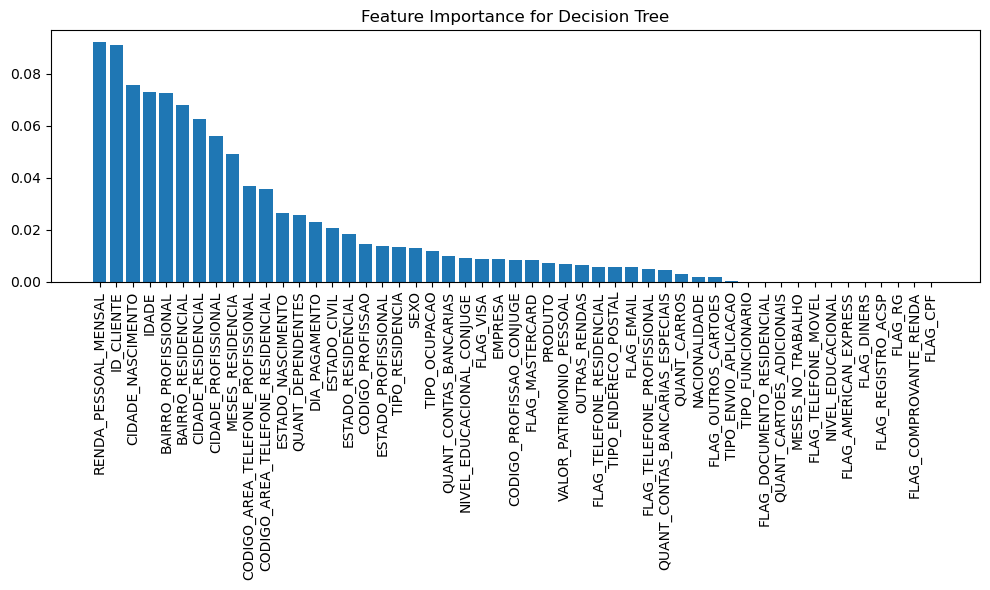

------------------------------------------------------------


In [62]:
models = {
          "Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier()
         }

# Now your loop will work correctly
# Get the feature names
feature_names = X_train.columns  

# Iterate over the models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Plot feature importance for models that support it
    if hasattr(model, 'feature_importances_'):

        # Tree-based models
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance for {model_name}")
        plt.bar(range(X_train.shape[1]), importance[indices], align="center")
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.show()

    elif model_name == "Logistic Regression":
        # For Logistic Regression, use the coefficients
        importance = np.abs(model.coef_[0])
        
        # Absolute value of the coefficients
        indices = np.argsort(importance)[::-1]
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance for {model_name}")
        plt.bar(range(X_train.shape[1]), importance[indices], align="center")
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.grid(False)
        plt.show()
    else:
        print(f"Feature importance not available for {model_name}")
    print("-" * 60)

Training Naive Bayes...


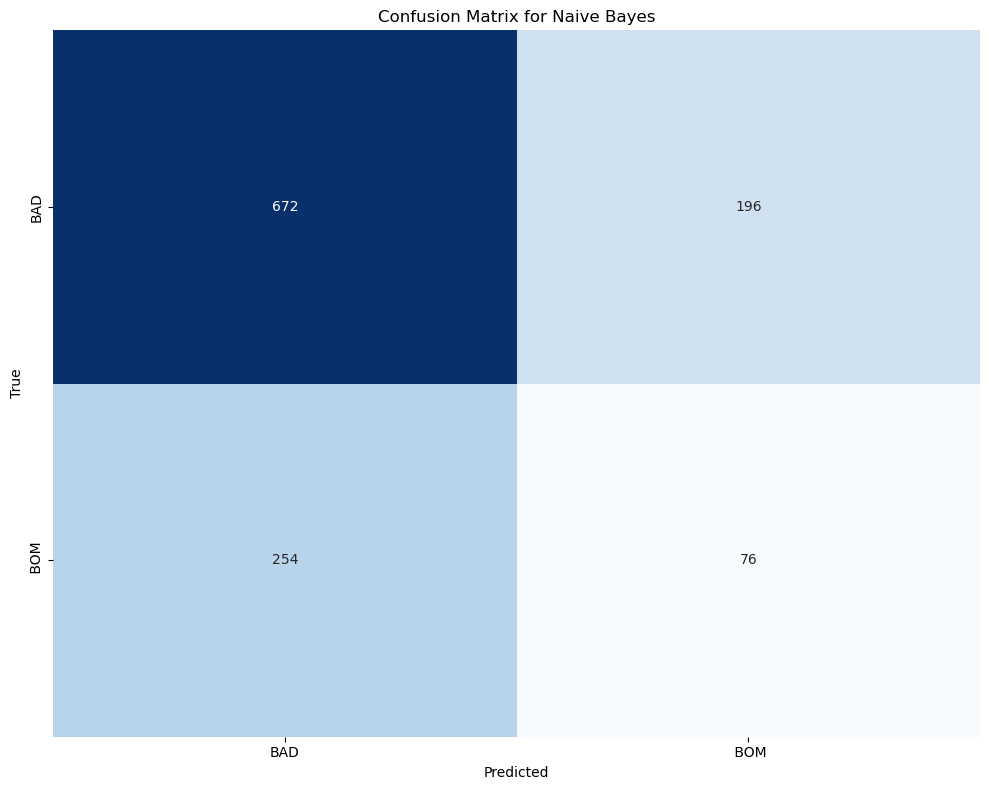

------------------------------------------------------------
Training Decision Tree...


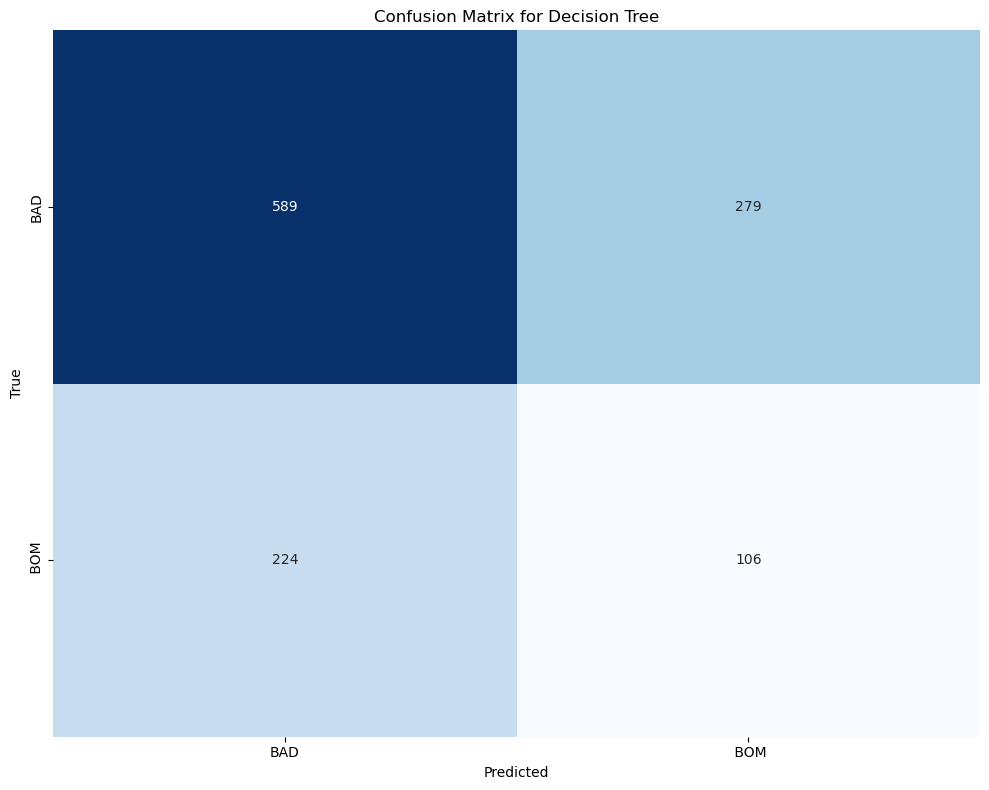

------------------------------------------------------------
Training Random Forest...


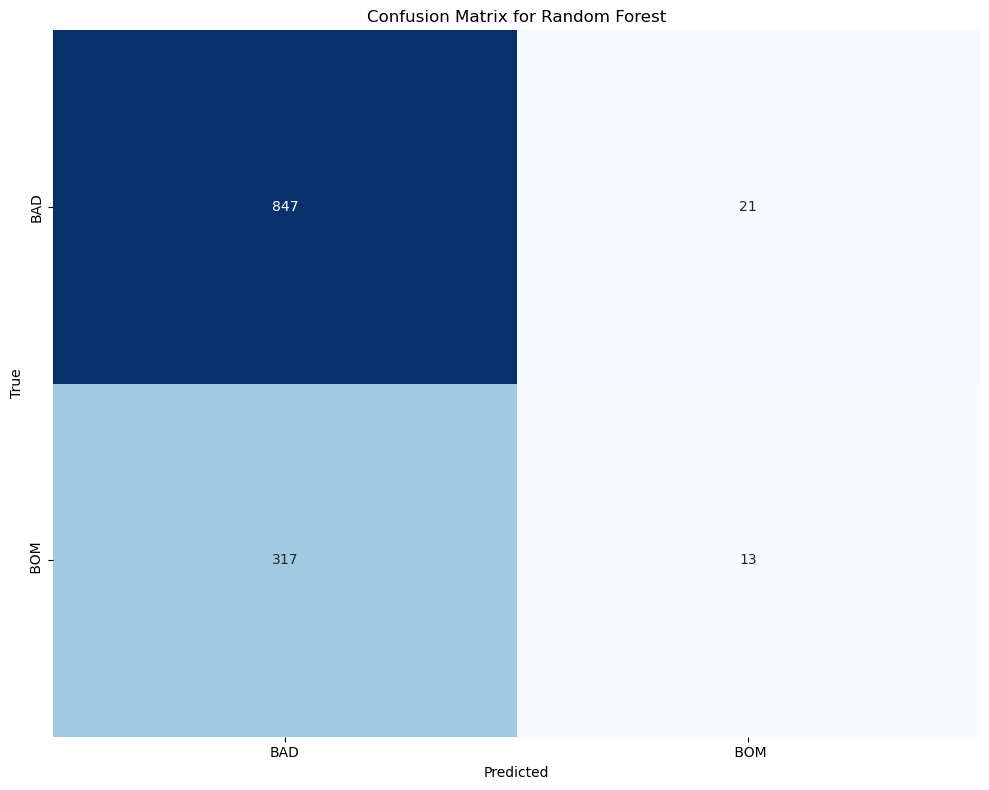

------------------------------------------------------------
Training Logistic Regression...


C:\Users\rafae\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


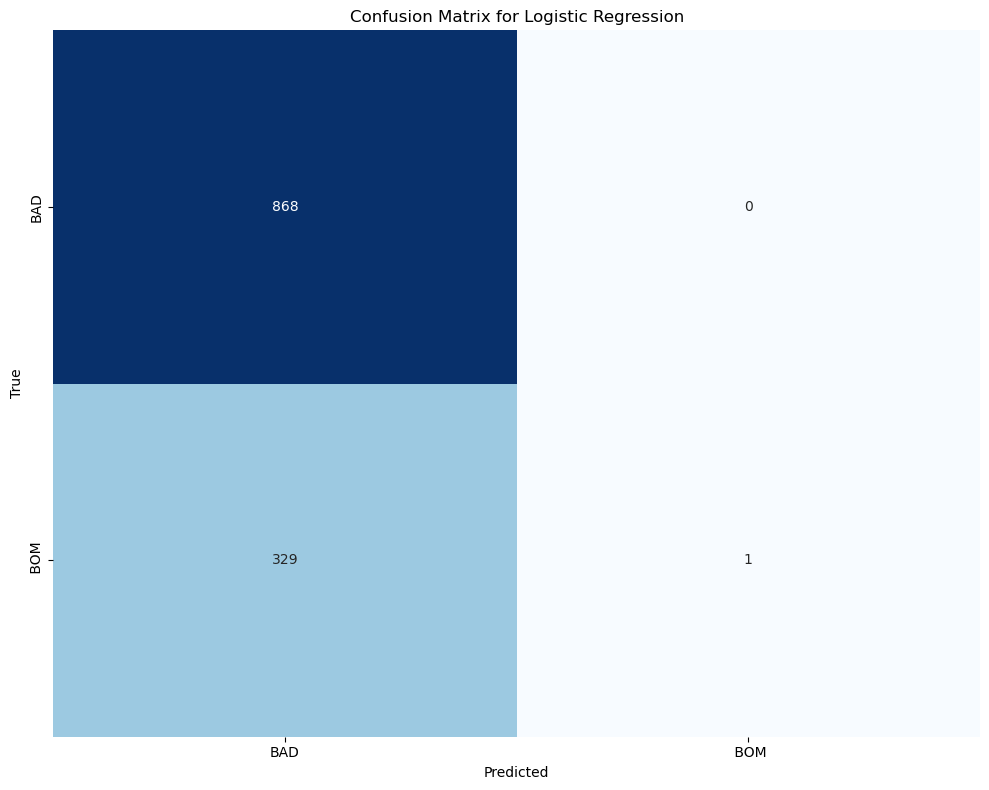

------------------------------------------------------------


In [63]:
from sklearn.metrics import confusion_matrix

# Define the models in a dictionary
models = {"Naive Bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000)}

# Define the class labels you want
class_labels = ["BAD", " BOM"]

# Iterate over the models and plot the confusion matrix for each
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model on the training dataset
    model.fit(X_train, y_train)
    
    # Make predictions on the test dataset
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix with labels
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    print("-" * 60)

Training Naive Bayes...


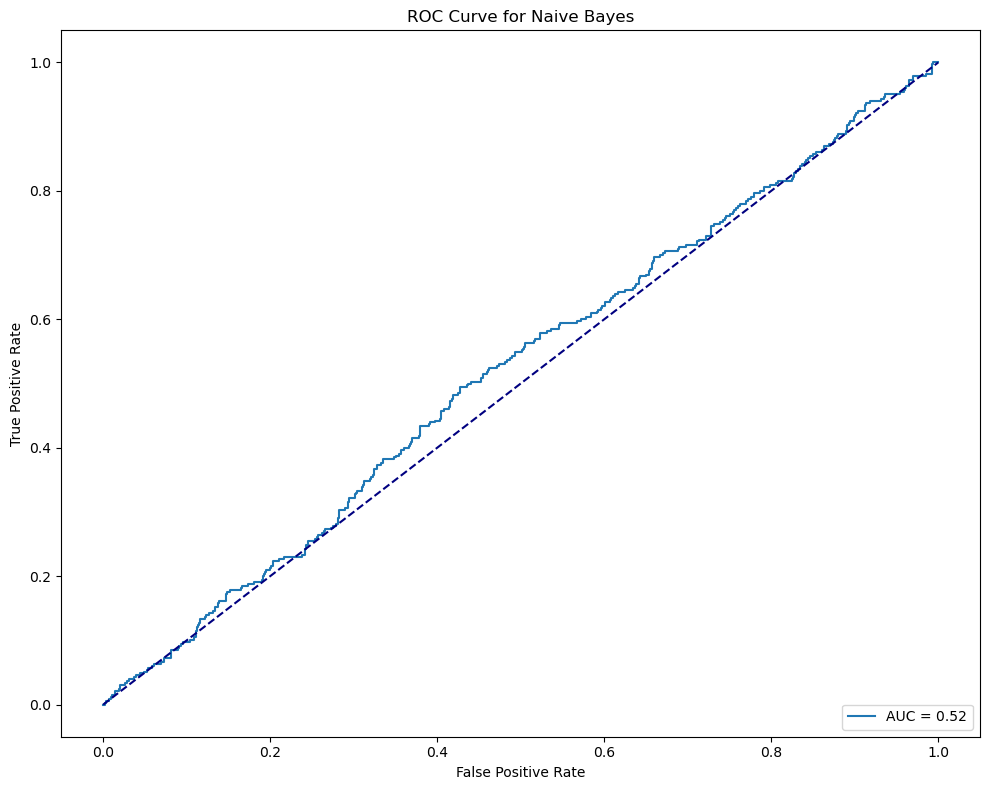

Training Decision Tree...


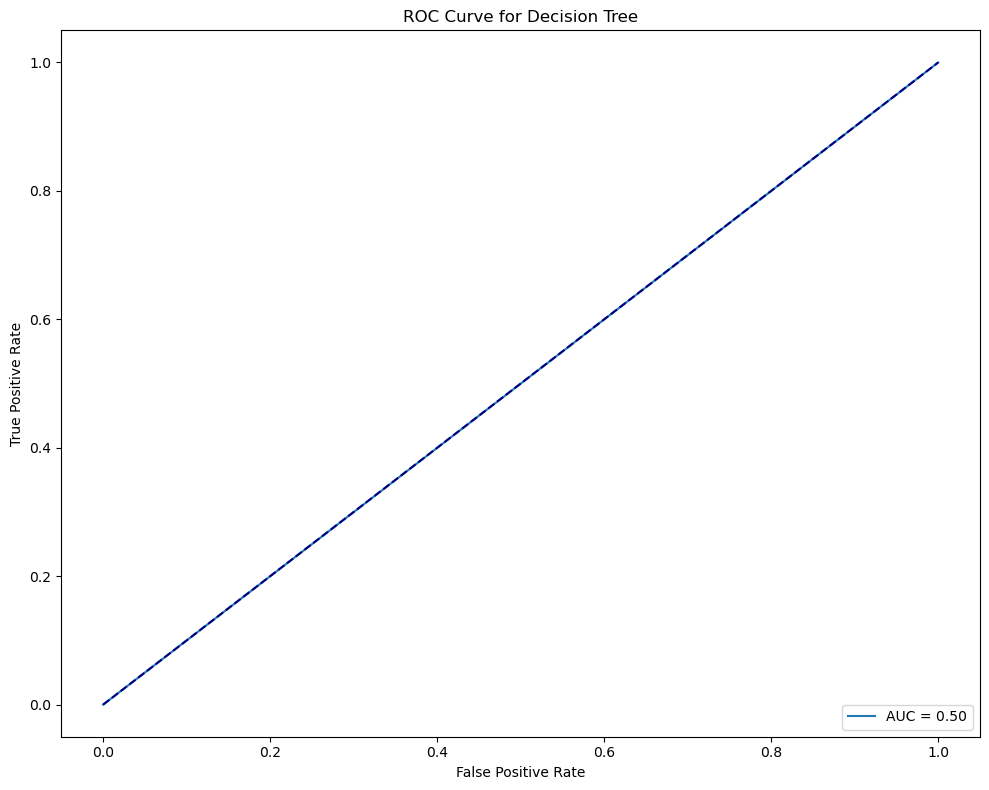

Training Random Forest...


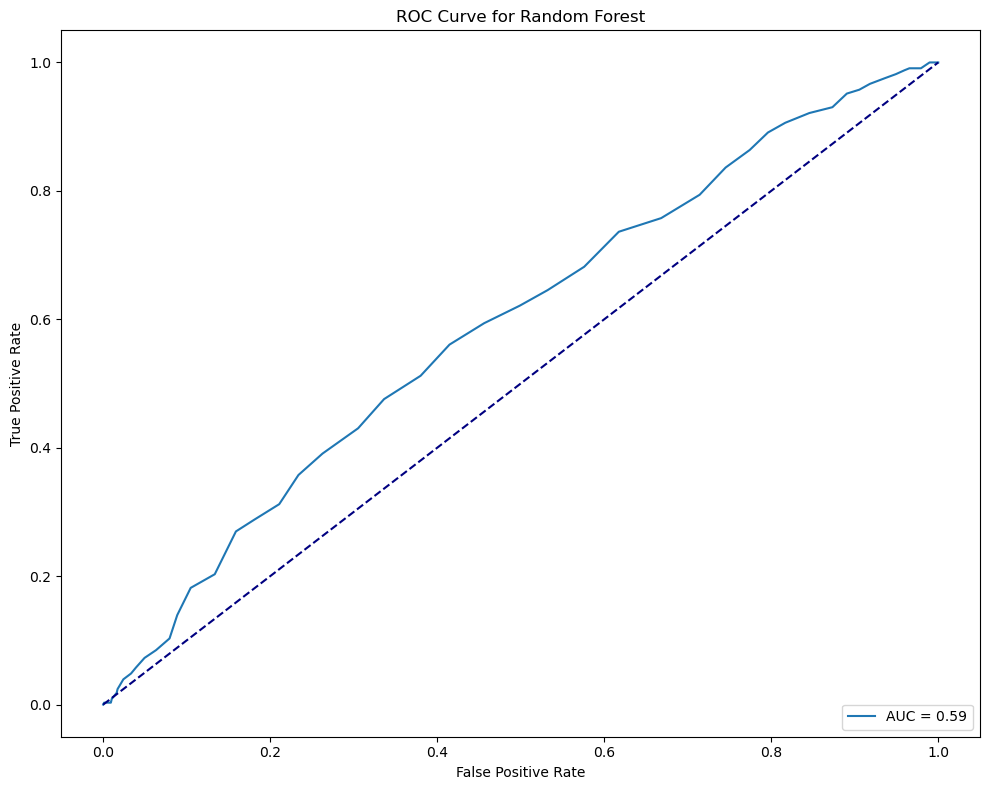

Training Logistic Regression...


C:\Users\rafae\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


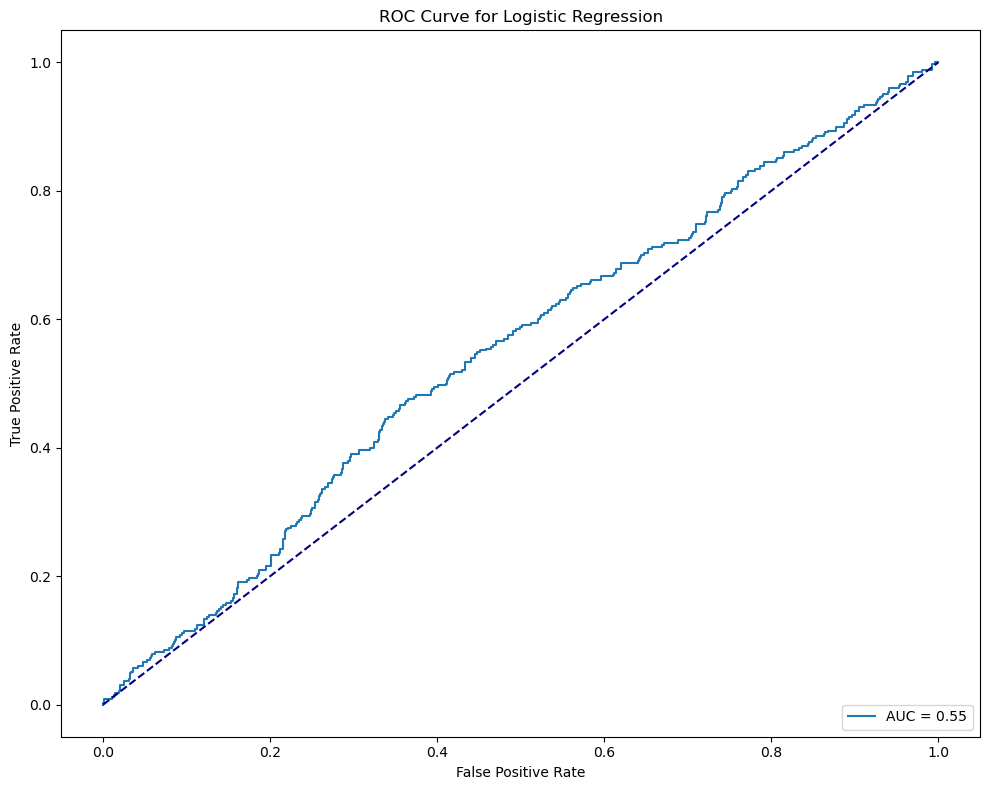

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

# Verificar se o problema é binário ou multiclasse
num_classes = len(np.unique(y_train))

# Definir os modelos
models = {"Naive Bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000)}

# Se for multiclasse, binarizar o target
if num_classes > 2:
    from sklearn.preprocessing import label_binarize
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
else:
    y_train_bin = y_train
    y_test_bin = y_test

# Treinar e plotar ROC para cada modelo
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    classifier = OneVsRestClassifier(model) if num_classes > 2 else model
    classifier.fit(X_train, y_train_bin)

    # Probabilidades das previsões
    y_prob = classifier.predict_proba(X_test)

    # Verifica se há NaNs nas probabilidades
    if np.isnan(y_prob).sum() > 0:
        print(f"There are NaN values in the predictions for model {model_name}. Skipping this model.")
        continue

    # Criar a curva ROC
    plt.figure(figsize=(10, 8))

    if num_classes > 2:
        for i in range(y_test_bin.shape[1]):  # Para cada classe
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
    else:
        fpr, tpr, _ = roc_curve(y_test_bin, y_prob[:, 1])  # Apenas a classe positiva
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")

    # Finalizar gráfico
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Linha diagonal (random guessing)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

In [65]:
from sklearn.metrics import classification_report

# Define the models in a dictionary
# Define the models in a dictionary
models = {"Naive Bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000)}

# Iterate over the models and compute classification reports
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)
  
    # Make predictions on the test set
    y_pred = model.predict(X_test)
 
    # Compute and display the classification report
    print(f"Classification Report for {model_name}:")
    report = classification_report(y_test, y_pred)
    print(report)
    print("-" * 60)

Training Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       868
           1       0.28      0.23      0.25       330

    accuracy                           0.62      1198
   macro avg       0.50      0.50      0.50      1198
weighted avg       0.60      0.62      0.61      1198

------------------------------------------------------------
Training Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       868
           1       0.28      0.32      0.30       330

    accuracy                           0.58      1198
   macro avg       0.50      0.50      0.50      1198
weighted avg       0.60      0.58      0.59      1198

------------------------------------------------------------
Training Random Forest...
Classification Report for Random Forest:
              precision    

C:\Users\rafae\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Definir os modelos corretamente
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000)
}

# Lista para armazenar as métricas de cada modelo
metrics_list = []

# Iterar sobre os modelos corretamente
for model_name, model in models.items():  # Adicionado .items()
    print(f"Treinando modelo: {model_name}")
    
    # Treinar o modelo
    model.fit(X_train, y_train)  

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcular as métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Armazenar as métricas desse modelo
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Converter a lista de métricas em um DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Identificar o melhor modelo com base no F1-Score
best_model_idx = metrics_df['F1-Score'].idxmax()

# Função para destacar o melhor modelo
def highlight_best(s):
    return ['background-color: yellow' if s.name == best_model_idx else '' for _ in s]

# Aplicar destaque ao melhor modelo
styled_df = metrics_df.style.apply(highlight_best, axis=1)

# Exibir DataFrame formatado
styled_df

Treinando modelo: Naive Bayes
Treinando modelo: Decision Tree
Treinando modelo: Random Forest
Treinando modelo: Logistic Regression


C:\Users\rafae\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.624374,0.602767,0.624374,0.612351
1,Decision Tree,0.580134,0.600754,0.580134,0.589414
2,Random Forest,0.717863,0.632544,0.717863,0.623697
3,Logistic Regression,0.725376,0.800857,0.725376,0.610770
